<a href="https://colab.research.google.com/github/carmencamargo3c-coder/googlecolaboratoryproyectoacciones/blob/main/Copia_de_Copia_de_proyecto3carmenhastaCORRELACION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO

## Importar datos

In [1]:
!fusermount -u /content/drive
!rm -rf /content/drive


fusermount: failed to unmount /content/drive: No such file or directory


El código que seleccionaste desmonta y luego elimina la carpeta donde Google Drive estaba montado en Colab (/content/drive). Esto se hace para asegurar que el punto de montaje esté limpio, generalmente antes de volver a montar Google Drive.

### Monta tu Drive en Colab:

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Ubica tu carpeta.

In [4]:
# Rutas a los archivos CSV y XLSX extraídos
csv_path = '/content/drive/MyDrive/3erproyectocarmen/datos_extraidos_3erproyecto/big_tech_companies.csv'
xlsx_path = '/content/drive/MyDrive/3erproyectocarmen/datos_extraidos_3erproyecto/big_tech_stock_prices.xlsx'

En resumen, este código guarda las rutas de dos archivos (uno CSV y uno XLSX) que están en tu Google Drive, dentro de dos variables llamadas csv_path y xlsx_path.

### Listar los archivos extraídos

In [ ]:
import os

# Define extract_path based on the directory of your file paths
extract_path = os.path.dirname(csv_path)

for root, dirs, files in os.walk(extract_path):
    for file in files:
        print(os.path.join(root, file))

/content/drive/MyDrive/3erproyectocarmen/datos_extraidos_3erproyecto/big_tech_companies.csv
/content/drive/MyDrive/3erproyectocarmen/datos_extraidos_3erproyecto/big_tech_stock_prices.xlsx


En resumen, el código recorre la carpeta especificada en extract_path y todas sus subcarpetas, imprimiendo la ruta completa de cada archivo que encuentra.

### Visualizar los datos

In [ ]:
import pandas as pd
import os

# Rutas a los archivos
base_path = "/content/drive/MyDrive/3erproyectocarmen/datos_extraidos_3erproyecto"
csv_path = os.path.join(base_path, "big_tech_companies.csv")
xlsx_path = os.path.join(base_path, "big_tech_stock_prices.xlsx")


# Cargar los datos
companies = pd.read_csv(csv_path)
prices = pd.read_excel(xlsx_path, parse_dates=["date"])  # detecta la fecha automáticamente

# Vista rápida
print("Companies:")
display(companies.head())

print("Prices:")
display(prices.head())

Companies:


,stock_symbol,company
0,AAPL,Apple Inc.
1,ADBE,Adobe Inc.
2,AMZN,"Amazon.com, Inc."
3,CRM,"Salesforce, Inc."
4,CSCO,"Cisco Systems, Inc."


Prices:


,stock_symbol,date,open,high,low,close,adj_close,volume
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600.0
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800.0
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000.0
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200.0
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800.0


este código carga tus dos archivos de datos (uno CSV y uno XLSX) en tablas de pandas llamadas companies y prices, y luego te muestra las primeras filas de cada tabla para que veas un adelanto de los datos. También se asegura de que la columna de "fecha" en el archivo de precios se lea correctamente como fechas.

In [ ]:
import os

csv_path = '/content/drive/MyDrive/3erproyectocarmen/datos_extraidos_3erproyecto/big_tech_companies.csv'
xlsx_path = '/content/drive/MyDrive/3erproyectocarmen/datos_extraidos_3erproyecto/big_tech_stock_prices.xlsx'


# Verify if the files exist
print(f"Checking for file: {csv_path}")
if os.path.exists(csv_path):
    print("✅ CSV file found!")
else:
    print("❌ CSV file NOT found. Please double-check the path and file name in Google Drive.")

print(f"\nChecking for file: {xlsx_path}")
if os.path.exists(xlsx_path):
    print("✅ XLSX file found!")
else:
    print("❌ XLSX file NOT found. Please double-check the path and file name in Google Drive.")

Checking for file: /content/drive/MyDrive/3erproyectocarmen/datos_extraidos_3erproyecto/big_tech_companies.csv
✅ CSV file found!

Checking for file: /content/drive/MyDrive/3erproyectocarmen/datos_extraidos_3erproyecto/big_tech_stock_prices.xlsx
✅ XLSX file found!


### Verificar la estructura

In [ ]:
print("Companies info:")
companies.info()

print("\nPrices info:")
prices.info()


Companies info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   stock_symbol  14 non-null     object
 1   company       14 non-null     object
dtypes: object(2)
memory usage: 356.0+ bytes

Prices info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45090 entries, 0 to 45089
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   stock_symbol  45090 non-null  object        
 1   date          45090 non-null  datetime64[ns]
 2   open          45090 non-null  float64       
 3   high          45090 non-null  float64       
 4   low           45090 non-null  float64       
 5   close         45090 non-null  float64       
 6   adj_close     45090 non-null  float64       
 7   volume        45090 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1

## Manejo de nulos

### Identificar nulos

En resumen, el código detecta cuántos datos faltan por columna, muestra el porcentaje de nulos y te enseña las filas donde están esos datos faltantes para que puedas verlos.

In [5]:
import pandas as pd
import os

# Rutas a los archivos
base_path = "/content/drive/MyDrive/3erproyectocarmen/datos_extraidos_3erproyecto"

csv_path = os.path.join(base_path, "big_tech_companies.csv")
xlsx_path = os.path.join(base_path, "big_tech_stock_prices.xlsx")

# Cargar los datos
# Asegurarse de que 'prices' DataFrame está definido
try:
    prices = pd.read_excel(xlsx_path, parse_dates=["date"])  # detecta la fecha automáticamente
except FileNotFoundError:
    print(f"Error: Archivo no encontrado en {xlsx_path}")
    prices = None # Set prices to None if file not found

if prices is not None:
  # Revisión de nulos por columna (en porcentaje y número absoluto)
  null_counts = prices.isnull().sum()
  null_percent = (prices.isnull().mean() * 100).round(2)

  print("Revisión de nulos por columna:")
  display(pd.DataFrame({
      "Nulos": null_counts,
      "Porcentaje": null_percent
  }).sort_values("Nulos", ascending=False))

  # Mostrar las filas con valores nulos
  rows_with_nulls = prices[prices.isnull().any(axis=1)]
  print("\nFilas con valores nulos:")
  if not rows_with_nulls.empty:
      display(rows_with_nulls)
  else:
      print("No se encontraron filas con valores nulos.")

else:
  print("No se pudo cargar el DataFrame 'prices' para verificar los nulos.")

Revisión de nulos por columna:


,Nulos,Porcentaje
date,1,0.0
open,1,0.0
high,1,0.0
low,1,0.0
adj_close,1,0.0
close,1,0.0
volume,1,0.0
stock_symbol,0,0.0



Filas con valores nulos:


,stock_symbol,date,open,high,low,close,adj_close,volume
45089,TSLA,NaT,NaN,NaN,NaN,NaN,NaN,NaN


*   veo que en la fila 45089 esta todo en blanco y **decidi borrarlo**



### Elimina nulos

Este código carga el archivo de precios, elimina la fila que tenía datos nulos (la fila 45089), y luego guarda el archivo de precios limpio y el archivo de empresas (asumiendo que ya estaba limpio) en nuevos archivos en tu Google Drive.

In [6]:
import pandas as pd
import os

# Define the directory to save the new files
output_dir = "/content/drive/MyDrive/3erproyectocarmen/datos_extraidos_3erproyecto"

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Define the paths for the new files
companies_output_path_csv = os.path.join(output_dir, "big_tech_companies_sinnulos.csv")
prices_output_path_xlsx = os.path.join(output_dir, "big_tech_stock_prices_sinnulos.xlsx")

# Define the path to the original prices file
original_prices_path_xlsx = "/content/drive/MyDrive/3erproyectocarmen/datos_extraidos_3erproyecto/big_tech_stock_prices.xlsx"

# Load the original prices DataFrame
try:
    prices = pd.read_excel(original_prices_path_xlsx, parse_dates=["date"])  # detecta la fecha automáticamente
except FileNotFoundError:
    print(f"Error: Archivo original no encontrado en {original_prices_path_xlsx}")
    prices = None # Set prices to None if file not found


if prices is not None:
    # Drop the row with index 45089 to handle nulls by removal
    prices_cleaned_nulls = prices.drop(index=45089).copy()

    # Save the companies DataFrame to a new CSV file
    # The 'companies' DataFrame does not have nulls based on previous checks
    # Assuming 'companies' DataFrame is available from a previous cell
    if 'companies' in globals():
        companies.to_csv(companies_output_path_csv, index=False)
        print(f"✅ Saved cleaned companies data to: {companies_output_path_csv}")
    else:
        print("⚠️ 'companies' DataFrame not found. Skipping saving companies data.")


    # Save the prices DataFrame (with row 45089 dropped) to a new XLSX file
    prices_cleaned_nulls.to_excel(prices_output_path_xlsx, index=False)
    print(f"✅ Saved cleaned prices data (null row dropped) to: {prices_output_path_xlsx}")

else:
    print("❌ Could not load the original prices DataFrame to handle nulls.")

⚠️ 'companies' DataFrame not found. Skipping saving companies data.
✅ Saved cleaned prices data (null row dropped) to: /content/drive/MyDrive/3erproyectocarmen/datos_extraidos_3erproyecto/big_tech_stock_prices_sinnulos.xlsx


### Verificar si se elimino los nulos

Este código carga los archivos "sin nulos" que guardaste en la celda anterior y verifica si realmente se eliminaron todos los valores nulos en esos nuevos archivos.

In [ ]:
import pandas as pd
import os

# Define the directory where the new files were saved
output_dir = "/content/drive/MyDrive/3erproyectocarmen/datos_extraidos_3erproyecto"

# Define the paths for the new files
companies_output_path_csv = os.path.join(output_dir, "big_tech_companies_sinnulos.csv")
prices_output_path_xlsx = os.path.join(output_dir, "big_tech_stock_prices_sinnulos.xlsx")

# Load the newly saved files
try:
    companies_clean = pd.read_csv(companies_output_path_csv)
    prices_clean = pd.read_excel(prices_output_path_xlsx) # Assuming Excel was saved without parsing dates here for null check

    # Check for nulls in the newly loaded DataFrames
    print("Nulos en el nuevo archivo 'big_tech_companies_sinnulos.csv':", companies_clean.isnull().sum().sum())
    print("Nulos en el nuevo archivo 'big_tech_stock_prices_sinnulos.xlsx':", prices_clean.isnull().sum().sum())

except FileNotFoundError:
    print("Error: No se encontraron los nuevos archivos. Asegúrate de que la celda anterior se ejecutó correctamente.")
except Exception as e:
    print(f"Ocurrió un error al cargar o verificar los archivos: {e}")

Nulos en el nuevo archivo 'big_tech_companies_sinnulos.csv': 0
Nulos en el nuevo archivo 'big_tech_stock_prices_sinnulos.xlsx': 0


¿Por qué algunos campos tienen valores nulos?
→ Porque en la fuente de datos pudo faltar información en ciertas fechas, errores de carga, o porque esa información simplemente no aplica para todos los registros.

¿Qué impacto tendría eliminar filas o columnas enteras con valores nulos?
→ Si eliminas filas, reduces el tamaño de tu dataset (puedes perder información valiosa).
→ Si eliminas columnas, corres el riesgo de perder variables relevantes para el análisis.

¿Cuándo es más apropiado imputar con media/mediana y cuándo no?
→ Media/mediana sirven cuando los datos son numéricos y no muy sesgados.
→ No es apropiado si hay outliers o distribuciones muy asimétricas (en ese caso la mediana es más robusta que la media).
→ Para categóricas, la moda es útil, pero si una categoría tiene muchas clases, puede distorsionar el análisis.

## Eliminar duplicados

### Identificar duplicados

Este código carga los archivos de datos limpios (sin nulos) y verifica si existen filas completamente duplicadas en ellos. Si encuentra duplicados, te muestra cuántos hay y cuáles son esas filas.

In [ ]:
import pandas as pd
import os

# Define the directory where the cleaned files are located
output_dir = "/content/drive/MyDrive/3erproyectocarmen/datos_extraidos_3erproyecto"

# Define the paths for the cleaned files
companies_clean_path = os.path.join(output_dir, "big_tech_companies_sinnulos.csv")
prices_clean_path = os.path.join(output_dir, "big_tech_stock_prices_sinnulos.xlsx")

# Load the cleaned dataframes
try:
    companies_clean = pd.read_csv(companies_clean_path)
    prices_clean = pd.read_excel(prices_clean_path, parse_dates=["date"]) # Parse dates when loading prices

    print("✅ Cleaned files loaded successfully.")

    # Check for duplicates in companies_clean across all columns
    dup_companies = companies_clean[companies_clean.duplicated(keep=False)] # Keep all occurrences of duplicates
    dup_companies_count = dup_companies.shape[0]
    print(f"\n🔍 Cantidad de duplicados encontrados en 'big_tech_companies_sinnulos.csv' (en todas las columnas): {dup_companies_count}")
    if dup_companies_count > 0:
        print("Duplicados encontrados en 'big_tech_companies_sinnulos.csv':")
        display(dup_companies.sort_values(by=list(companies_clean.columns))) # Sort to see duplicates together


    # Check for duplicates in prices_clean across all columns
    dup_prices = prices_clean[prices_clean.duplicated(keep=False)] # Keep all occurrences of duplicates
    dup_prices_count = dup_prices.shape[0]
    print(f"\n🔍 Cantidad de duplicados encontrados en 'big_tech_stock_prices_sinnulos.xlsx' (en todas las columnas): {dup_prices_count}")
    if dup_prices_count > 0:
        print("Duplicados encontrados en 'big_tech_stock_prices_sinnulos.xlsx':")
        display(dup_prices.sort_values(by=list(prices_clean.columns))) # Sort to see duplicates together


except FileNotFoundError:
    print("Error: No se encontraron los archivos limpios. Asegúrate de que se guardaron correctamente.")
except Exception as e:
    print(f"Ocurrió un error al cargar o verificar los archivos: {e}")

✅ Cleaned files loaded successfully.

🔍 Cantidad de duplicados encontrados en 'big_tech_companies_sinnulos.csv' (en todas las columnas): 0

🔍 Cantidad de duplicados encontrados en 'big_tech_stock_prices_sinnulos.xlsx' (en todas las columnas): 2
Duplicados encontrados en 'big_tech_stock_prices_sinnulos.xlsx':


,stock_symbol,date,open,high,low,close,adj_close,volume
45087,TSLA,2022-12-29,120.389999,123.57,117.5,121.82,121.82,221923300
45088,TSLA,2022-12-29,120.389999,123.57,117.5,121.82,121.82,221923300


Primero necesitamos pensar: ¿qué hace que un registro de precios de acciones sea único?
En este caso:

stock_symbol (símbolo de la acción)

date (fecha de cotización)

👉 Es poco probable que un mismo símbolo tenga dos registros diferentes en la misma fecha. Por lo tanto, esos dos campos son las claves para detectar duplicados.

### Eliminar duplicados

Este código carga el archivo de precios que contenía duplicados, elimina las filas completamente duplicadas (dejando solo la primera), y guarda el resultado en un nuevo archivo de Excel sin duplicados.

In [ ]:
import pandas as pd
import os

# Define the directory where the cleaned files are located
output_dir = "/content/drive/MyDrive/3erproyectocarmen/datos_extraidos_3erproyecto"

# Define the path for the cleaned prices file
prices_clean_path = os.path.join(output_dir, "big_tech_stock_prices_sinnulos.xlsx")
prices_no_duplicates_path_xlsx = os.path.join(output_dir, "big_tech_stock_prices_sinduplicados.xlsx") # New path

# Load the cleaned prices data
try:
    prices_clean = pd.read_excel(prices_clean_path, parse_dates=["date"]) # Load the cleaned prices data

    # Eliminar duplicados exactos en todas las columnas
    prices_no_duplicates = prices_clean.drop_duplicates(keep='first').copy() # Remove duplicates across all columns

    print(f"✅ Filas después de eliminar duplicados: {prices_no_duplicates.shape[0]}")
    print(f"Se eliminaron {prices_clean.shape[0] - prices_no_duplicates.shape[0]} filas duplicadas.")

    # Guardar el DataFrame sin duplicados en un nuevo archivo
    prices_no_duplicates.to_excel(prices_no_duplicates_path_xlsx, index=False)
    print(f"\n✅ Guardado archivo de precios sin duplicados en: {prices_no_duplicates_path_xlsx}")


except FileNotFoundError:
    print(f"Error: No se encontró el archivo limpio en {prices_clean_path}. Asegúrate de que se guardó correctamente.")
except Exception as e:
    print(f"Ocurrió un error al cargar, eliminar duplicados o guardar el archivo: {e}")

✅ Filas después de eliminar duplicados: 45089
Se eliminaron 1 filas duplicadas.

✅ Guardado archivo de precios sin duplicados en: /content/drive/MyDrive/3erproyectocarmen/datos_extraidos_3erproyecto/big_tech_stock_prices_sinduplicados.xlsx


### Verificar si se elimino los duplicados

Este código carga el archivo de precios que ya le quitaste los duplicados completos, y luego revisa si quedaron filas con la misma empresa y la misma fecha. Si encuentra alguna, te las muestra.

In [7]:
import pandas as pd
import os

# Define the path to the file without duplicates
output_dir = "/content/drive/MyDrive/3erproyectocarmen/datos_extraidos_3erproyecto"
prices_no_duplicates_path_xlsx = os.path.join(output_dir, "big_tech_stock_prices_sinduplicados.xlsx")

# Load the data from the file without duplicates
try:
    prices_no_duplicates = pd.read_excel(prices_no_duplicates_path_xlsx, parse_dates=["date"]) # Load the data

    # Check for duplicates based on specified columns and show them
    dup_subset = prices_no_duplicates[prices_no_duplicates.duplicated(subset=["stock_symbol", "date"], keep=False)] # Keep all occurrences of duplicates
    dup_subset_count = dup_subset.shape[0]

    print(f"🔍 Cantidad de duplicados restantes (basado en stock_symbol y date): {dup_subset_count}")

    if dup_subset_count > 0:
        print("\nDuplicados encontrados (basado en stock_symbol y date):")
        display(dup_subset.sort_values(by=["stock_symbol", "date"])) # Sort to see duplicates together


except FileNotFoundError:
    print(f"Error: No se encontró el archivo sin duplicados en {prices_no_duplicates_path_xlsx}. Asegúrate de que se guardó correctamente.")
except Exception as e:
    print(f"Ocurrió un error al cargar o verificar duplicados: {e}")

🔍 Cantidad de duplicados restantes (basado en stock_symbol y date): 2

Duplicados encontrados (basado en stock_symbol y date):


,stock_symbol,date,open,high,low,close,adj_close,volume
45087,TSLA,2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,2.219233e+08
45088,TSLA,2022-12-29,89.267274,90.370562,88.112582,89.272028,85.210443,5.298188e+07


¿Un duplicado es realmente un error o una entrada válida repetida?

Puede ser error (datos cargados dos veces por la misma fecha).

Pero también puede ser válido si una acción se reporta en distintos mercados o con ligeras variaciones. Por eso siempre hay que analizar antes de borrar.

¿Qué impacto tendría dejar duplicados en el análisis o modelo?

Si dejas duplicados, inflas artificialmente el volumen de transacciones o los precios promedio.

Esto distorsiona gráficos, estadísticas descriptivas y, peor aún, los modelos predictivos.

## Filtrar datos fuera del alcance

### Identificar valores ilógicos

En el contexto de precios de acciones, un registro válido debe cumplir ciertos criterios mínimos:

Precios no negativos: variables como open, high, low, close y adj_close no pueden ser menores a 0.

Volumen válido: el número de acciones negociadas (volume) debe ser ≥ 0.

Coherencia interna: el precio mínimo (low) nunca debe ser mayor que el precio máximo (high) en un mismo día.

Este código carga tu tabla de precios y busca registros que contengan valores ilógicos para el contexto de acciones, como precios o volúmenes negativos, o donde el precio máximo sea menor que el mínimo del día.

In [9]:
import pandas as pd
import os

# Define the path to the file without duplicates
output_dir = "/content/drive/MyDrive/3erproyectocarmen/datos_extraidos_3erproyecto"
prices_no_duplicates_path_xlsx = os.path.join(output_dir, "big_tech_stock_prices_sinduplicados.xlsx")

# Load the data from the file without duplicates
try:
    prices_no_duplicates = pd.read_excel(prices_no_duplicates_path_xlsx, parse_dates=["date"]) # Load the data

    # Detectar registros fuera de alcance en el archivo de precios sin duplicados

    # Registros con precios negativos
    invalid_prices = prices_no_duplicates[
        (prices_no_duplicates["open"] < 0) | (prices_no_duplicates["high"] < 0) |
        (prices_no_duplicates["low"] < 0) | (prices_no_duplicates["close"] < 0) |
        (prices_no_duplicates["adj_close"] < 0)
    ]

    # Registros con volumen negativo
    invalid_volume = prices_no_duplicates[prices_no_duplicates["volume"] < 0]

    # Registros con incoherencia high < low
    invalid_range = prices_no_duplicates[prices_no_duplicates["high"] < prices_no_duplicates["low"]]

    print("🔍 Precios negativos encontrados:", invalid_prices.shape[0])
    if not invalid_prices.empty:
        print("Filas con precios negativos:")
        display(invalid_prices)

    print("\n🔍 Volúmenes negativos encontrados:", invalid_volume.shape[0])
    if not invalid_volume.empty:
        print("Filas con volúmenes negativos:")
        display(invalid_volume)

    print("\n🔍 Inconsistencias (high < low):", invalid_range.shape[0])
    if not invalid_range.empty:
        print("Filas con inconsistencias (high < low):")
        display(invalid_range)


    # Note: The defined "out-of-scope" criteria (negative prices, volume, high<low)
    # do not apply to the big_tech_companies_sinnulos.csv file.


except FileNotFoundError:
    print(f"Error: No se encontró el archivo sin duplicados en {prices_no_duplicates_path_xlsx}. Asegúrate de que se guardó correctamente.")
except Exception as e:
    print(f"Ocurrió un error al cargar o detectar datos fuera de alcance: {e}")

🔍 Precios negativos encontrados: 0

🔍 Volúmenes negativos encontrados: 0

🔍 Inconsistencias (high < low): 0


Este código carga tus datos de precios, identifica los registros que no cumplen criterios lógicos (precios o volúmenes negativos, o precio máximo menor que el mínimo) y luego crea una nueva tabla que solo incluye los registros válidos.

### Identifica los registros que no cumplen criterios lógicos

Este código carga tus datos de precios, identifica los registros que no cumplen criterios lógicos (precios o volúmenes negativos, o precio máximo menor que el mínimo) y luego crea una nueva tabla que solo incluye los registros válidos.

In [10]:
import pandas as pd
import os

# Define the path to the file without duplicates
output_dir = "/content/drive/MyDrive/3erproyectocarmen/datos_extraidos_3erproyecto"
prices_no_duplicates_path_xlsx = os.path.join(output_dir, "big_tech_stock_prices_sinduplicados.xlsx")

# Load the data from the file without duplicates
try:
    prices_no_duplicates = pd.read_excel(prices_no_duplicates_path_xlsx, parse_dates=["date"]) # Load the data

    # Define the filtering criteria
    valid_criteria = (
        (prices_no_duplicates["open"] >= 0) &
        (prices_no_duplicates["high"] >= 0) &
        (prices_no_duplicates["low"] >= 0) &
        (prices_no_duplicates["close"] >= 0) &
        (prices_no_duplicates["adj_close"] >= 0) &
        (prices_no_duplicates["volume"] >= 0) &
        (prices_no_duplicates["high"] >= prices_no_duplicates["low"])
    )

    # Identify records that are OUT of scope (inverse of the filtering criteria)
    invalid_records = prices_no_duplicates[~valid_criteria]

    print("🔍 Registros identificados como fuera de alcance (serán filtrados):")
    if not invalid_records.empty:
        display(invalid_records)
    else:
        print("No se encontraron registros fuera de alcance.")


    # Now apply the filter to keep ONLY the valid records
    prices_filtered = prices_no_duplicates[valid_criteria].copy() # Use .copy() to avoid SettingWithCopyWarning

    print("\n✅ Dataset después del filtrado:", prices_filtered.shape)
    print(f"Se eliminaron {prices_no_duplicates.shape[0] - prices_filtered.shape[0]} registros fuera de alcance.")

except FileNotFoundError:
    print(f"Error: No se encontró el archivo sin duplicados en {prices_no_duplicates_path_xlsx}. Asegúrate de que se guardó correctamente.")
except Exception as e:
    print(f"Ocurrió un error al cargar o filtrar datos: {e}")

🔍 Registros identificados como fuera de alcance (serán filtrados):
No se encontraron registros fuera de alcance.

✅ Dataset después del filtrado: (45089, 8)
Se eliminaron 0 registros fuera de alcance.


¿Está claro qué está dentro y fuera del alcance?

Sí: en este análisis se consideran válidos únicamente los registros con precios y volúmenes no negativos y coherentes.

¿Eliminar estos datos puede ocultar información valiosa?

Si los registros inválidos son errores de carga, eliminarlos mejora la calidad del dataset.

Sin embargo, en algunos casos extremos (ej. volumen 0 en un día sin operaciones), eliminar el dato podría ocultar un evento interesante.

La decisión depende del objetivo: si buscamos un modelo predictivo robusto, priorizamos limpieza; si queremos detectar anomalías, convendría analizarlos aparte.

In [ ]:
print(companies.columns)


Index(['stock_symbol', 'company'], dtype='object')


## Detectar y corregir valores atípicos en variables categóricas

Este código carga tus tablas de datos limpias, revisa si hay inconsistencias o errores en los nombres de las empresas (como espacios extra o mayúsculas/minúsculas diferentes), intenta corregirlos estandarizando los nombres, y verifica si todos los nombres de empresas coinciden entre tus dos tablas de datos.


In [11]:
import pandas as pd

# --- Rutas en tu Drive a los archivos limpios ---
output_dir = "/content/drive/MyDrive/3erproyectocarmen/datos_extraidos_3erproyecto"
path_companies_clean = os.path.join(output_dir, "big_tech_companies_sinnulos.csv")
path_prices_clean = os.path.join(output_dir, "big_tech_stock_prices_sinduplicados.xlsx")


# --- Cargar datos limpios ---
try:
    companies = pd.read_csv(path_companies_clean)
    # Ensure parsing dates when loading prices, although this cell focuses on categorical
    stocks = pd.read_excel(path_prices_clean) # parse_dates=["date"] might not be strictly needed here but good practice later

    print("✅ Archivos limpios cargados correctamente.")

    # --- Paso 1: Revisar categorías únicas ---
    print("\nCategorías únicas en stock_symbol (precios limpios):")
    # Check if 'stock_symbol' column exists in the loaded DataFrame before accessing it
    if 'stock_symbol' in stocks.columns:
      print(stocks["stock_symbol"].unique())
    else:
      print("⚠️ Columna 'stock_symbol' no encontrada en el archivo de precios limpio.")


    print("\nCategorías únicas en stock_symbol (empresas limpias):")
    # Check if 'stock_symbol' column exists in the loaded DataFrame before accessing it
    if 'stock_symbol' in companies.columns:
      print(companies["stock_symbol"].unique())
    else:
      print("⚠️ Columna 'stock_symbol' no encontrada en el archivo de empresas limpio.")

    # --- Paso 2: Corregir errores tipográficos (Asegurarse de que las columnas existan) ---
    # Si en companies está como 'tock_symbol', lo renombramos (verificando existencia)
    if "tock_symbol" in companies.columns:
        companies = companies.rename(columns={"tock_symbol": "stock_symbol"})
        print("✅ Columna 'tock_symbol' renombrada a 'stock_symbol' en companies.")


    # Estandarizar símbolos (mayúsculas + quitar espacios), verificando existencia de columna
    if 'stock_symbol' in stocks.columns:
        stocks["stock_symbol"] = stocks["stock_symbol"].astype(str).str.strip().str.upper()
        print("✅ Símbolos de stock estandarizados en precios.")
    else:
         print("⚠️ No se pudo estandarizar 'stock_symbol' en precios: columna no encontrada.")

    if 'stock_symbol' in companies.columns:
        companies["stock_symbol"] = companies["stock_symbol"].astype(str).str.strip().str.upper()
        print("✅ Símbolos de stock estandarizados en empresas.")
    else:
        print("⚠️ No se pudo estandarizar 'stock_symbol' en empresas: columna no encontrada.")


    # --- Paso 3: Revisar de nuevo categorías únicas (después de estandarizar) ---
    if 'stock_symbol' in stocks.columns:
      print("\nCategorías únicas después de limpieza (precios):")
      print(stocks["stock_symbol"].unique())

    if 'stock_symbol' in companies.columns:
      print("\nCategorías únicas después de limpieza (empresas):")
      print(companies["stock_symbol"].unique())


    # --- Paso 4: Verificar consistencia entre tablas (Solo si la columna stock_symbol existe en ambos) ---
    if 'stock_symbol' in stocks.columns and 'stock_symbol' in companies.columns:
        missing = set(stocks["stock_symbol"].unique()) - set(companies["stock_symbol"].unique())
        if missing:
            print("\n⚠️ Símbolos en precios que NO están en tabla de empresas:", missing)
        else:
            print("\n✅ Todos los símbolos coinciden entre precios y empresas.")
    else:
        print("\n⚠️ No se pudo verificar consistencia entre tablas: falta la columna 'stock_symbol' en uno o ambos DataFrames.")


except FileNotFoundError:
    print("Error: Asegúrate de que los archivos limpios ('big_tech_companies_sinnulos.csv' y 'big_tech_stock_prices_sinduplicados.xlsx') existan en la ruta especificada.")
except Exception as e:
    print(f"Ocurrió un error al cargar o procesar los archivos: {e}")

✅ Archivos limpios cargados correctamente.

Categorías únicas en stock_symbol (precios limpios):
['AAPL' 'ADBE' 'AMZN' 'CRM' 'CSCO' 'GOOGL' 'IBM' 'INTC' 'META' 'MSFT'
 'NFLX' 'NVDA' 'ORCL' 'TSLA']

Categorías únicas en stock_symbol (empresas limpias):
['AAPL' 'ADBE' 'AMZN' 'CRM' 'CSCO' 'GOOGL' 'IBM' 'INTC' 'META' 'MSFT'
 'NFLX' 'NVDA' 'ORCL' 'TSLA']
✅ Símbolos de stock estandarizados en precios.
✅ Símbolos de stock estandarizados en empresas.

Categorías únicas después de limpieza (precios):
['AAPL' 'ADBE' 'AMZN' 'CRM' 'CSCO' 'GOOGL' 'IBM' 'INTC' 'META' 'MSFT'
 'NFLX' 'NVDA' 'ORCL' 'TSLA']

Categorías únicas después de limpieza (empresas):
['AAPL' 'ADBE' 'AMZN' 'CRM' 'CSCO' 'GOOGL' 'IBM' 'INTC' 'META' 'MSFT'
 'NFLX' 'NVDA' 'ORCL' 'TSLA']

✅ Todos los símbolos coinciden entre precios y empresas.


## Detectar y corregir valores atípicos en variables numéricas

### Detecta valores atípicos

Este código detecta valores atípicos (outliers) en las variables numéricas de tus datos de precios usando dos métodos (Z-Score e IQR), te muestra cuántos encuentra con cada método y te da ejemplos de las filas que contienen estos valores extremos.

In [ ]:
# --- Importar librerías ---
import pandas as pd
import numpy as np
from scipy import stats
import os

# --- Definir ruta al archivo limpio sin duplicados ---
output_dir = "/content/drive/MyDrive/3erproyectocarmen/datos_extraidos_3erproyecto"
prices_no_duplicates_path_xlsx = os.path.join(output_dir, "big_tech_stock_prices_sinduplicados.xlsx")

# --- Cargar datos limpios sin duplicados ---
try:
    prices_clean_num = pd.read_excel(prices_no_duplicates_path_xlsx, parse_dates=["date"]) # Load the data
    print("✅ Archivo de precios sin duplicados cargado para detección de outliers numéricos.")

    # --- Seleccionar las variables a analizar ---
    columnas = ["open", "high", "low", "adj_close", "volume"]

    # --- Iterar sobre cada columna ---
    for columna in columnas:
        # --- Método Z-Score ---
        # Calculate z-scores on the original column, NaNs will result in NaN z-scores
        z_scores = np.abs(stats.zscore(prices_clean_num[columna]))
        umbral_z = 3
        # Filter using the original DataFrame and the calculated z-scores
        outliers_z = prices_clean_num[columna][(z_scores > umbral_z) & (~np.isnan(z_scores))]

        # --- Método IQR ---
        Q1 = prices_clean_num[columna].quantile(0.25)
        Q3 = prices_clean_num[columna].quantile(0.75)
        IQR = Q3 - Q1
        umbral_inferior = Q1 - 1.5 * IQR
        umbral_superior = Q3 + 1.5 * IQR
        # Filter the entire rows where the value in the column is an outlier by IQR
        outliers_iqr_rows = prices_clean_num[
            (prices_clean_num[columna] < umbral_inferior) |
            (prices_clean_num[columna] > umbral_superior)
        ]

        # --- Mostrar resultados ---
        print(f"\n📊 Variable analizada: {columna}")
        print(f"👉 Outliers con Z-Score (>{umbral_z}): {len(outliers_z)}")
        print(f"👉 Outliers con IQR fuera de [{umbral_inferior:.2f}, {umbral_superior:.2f}]: {outliers_iqr_rows.shape[0]}\n")

        print("🔍 Ejemplos de filas con valores extremos (primeras 5 detectadas con IQR):")
        if not outliers_iqr_rows.empty:
            display(outliers_iqr_rows.head()) # Display the first 5 rows that are outliers
        else:
            print("No se encontraron filas con valores extremos.")


        # --- Opciones de tratamiento ---
        print("\n⚖️ Opciones de tratamiento:")
        print("1️⃣ Conservar: si son eventos reales (crisis, picos de volumen, etc.)")
        print("2️⃣ Eliminar: si son errores evidentes de registro o distorsionan el análisis")
        print("3️⃣ Corregir/Imputar: reemplazar por media/mediana si se justifica\n")

        # --- Preguntas de pensamiento crítico ---
        print("❓ ¿Estos valores extremos son errores o eventos reales?")
        print("❓ ¿Qué gano y qué pierdo al eliminarlos?")
        print("-" * 50) # Separador para cada columna


except FileNotFoundError:
    print(f"Error: No se encontró el archivo sin duplicados en {prices_no_duplicates_path_xlsx}. Asegúrate de que se guardó correctamente.")
except Exception as e:
    print(f"Ocurrió un error al cargar o detectar outliers: {e}")

✅ Archivo de precios sin duplicados cargado para detección de outliers numéricos.

📊 Variable analizada: open
👉 Outliers con Z-Score (>3): 1007
👉 Outliers con IQR fuera de [-128.82, 283.15]: 2553

🔍 Ejemplos de filas con valores extremos (primeras 5 detectadas con IQR):


,stock_symbol,date,open,high,low,close,adj_close,volume
5615,ADBE,2019-04-29,286.459991,291.709991,285.380005,286.140015,286.140015,5592400.0
5616,ADBE,2019-04-30,286.100006,289.769989,285.250000,289.250000,289.250000,3068000.0
5617,ADBE,2019-05-01,291.000000,291.000000,283.190002,283.350006,283.350006,2056200.0
5645,ADBE,2019-06-11,283.910004,284.890015,272.029999,275.989990,275.989990,2969300.0
5651,ADBE,2019-06-19,287.000000,292.000000,284.339996,291.209991,291.209991,9738600.0



⚖️ Opciones de tratamiento:
1️⃣ Conservar: si son eventos reales (crisis, picos de volumen, etc.)
2️⃣ Eliminar: si son errores evidentes de registro o distorsionan el análisis
3️⃣ Corregir/Imputar: reemplazar por media/mediana si se justifica

❓ ¿Estos valores extremos son errores o eventos reales?
❓ ¿Qué gano y qué pierdo al eliminarlos?
--------------------------------------------------

📊 Variable analizada: high
👉 Outliers con Z-Score (>3): 1019
👉 Outliers con IQR fuera de [-129.95, 285.72]: 2594

🔍 Ejemplos de filas con valores extremos (primeras 5 detectadas con IQR):


,stock_symbol,date,open,high,low,close,adj_close,volume
5615,ADBE,2019-04-29,286.459991,291.709991,285.380005,286.140015,286.140015,5592400.0
5616,ADBE,2019-04-30,286.100006,289.769989,285.250000,289.250000,289.250000,3068000.0
5617,ADBE,2019-05-01,291.000000,291.000000,283.190002,283.350006,283.350006,2056200.0
5619,ADBE,2019-05-03,282.559998,286.350006,282.390015,285.579987,285.579987,1979500.0
5628,ADBE,2019-05-16,278.630005,285.869995,278.399994,283.549988,283.549988,3413100.0



⚖️ Opciones de tratamiento:
1️⃣ Conservar: si son eventos reales (crisis, picos de volumen, etc.)
2️⃣ Eliminar: si son errores evidentes de registro o distorsionan el análisis
3️⃣ Corregir/Imputar: reemplazar por media/mediana si se justifica

❓ ¿Estos valores extremos son errores o eventos reales?
❓ ¿Qué gano y qué pierdo al eliminarlos?
--------------------------------------------------

📊 Variable analizada: low
👉 Outliers con Z-Score (>3): 1005
👉 Outliers con IQR fuera de [-127.47, 280.08]: 2514

🔍 Ejemplos de filas con valores extremos (primeras 5 detectadas con IQR):


,stock_symbol,date,open,high,low,close,adj_close,volume
5615,ADBE,2019-04-29,286.459991,291.709991,285.380005,286.140015,286.140015,5592400.0
5616,ADBE,2019-04-30,286.100006,289.769989,285.250000,289.250000,289.250000,3068000.0
5617,ADBE,2019-05-01,291.000000,291.000000,283.190002,283.350006,283.350006,2056200.0
5619,ADBE,2019-05-03,282.559998,286.350006,282.390015,285.579987,285.579987,1979500.0
5644,ADBE,2019-06-10,280.980011,284.980011,280.200012,280.339996,280.339996,2487700.0



⚖️ Opciones de tratamiento:
1️⃣ Conservar: si son eventos reales (crisis, picos de volumen, etc.)
2️⃣ Eliminar: si son errores evidentes de registro o distorsionan el análisis
3️⃣ Corregir/Imputar: reemplazar por media/mediana si se justifica

❓ ¿Estos valores extremos son errores o eventos reales?
❓ ¿Qué gano y qué pierdo al eliminarlos?
--------------------------------------------------

📊 Variable analizada: adj_close
👉 Outliers con Z-Score (>3): 1035
👉 Outliers con IQR fuera de [-115.31, 251.06]: 3334

🔍 Ejemplos de filas con valores extremos (primeras 5 detectadas con IQR):


,stock_symbol,date,open,high,low,close,adj_close,volume
5388,ADBE,2018-06-01,250.550003,251.830002,248.850006,251.309998,251.309998,2773200.0
5389,ADBE,2018-06-04,252.850006,254.720001,251.100006,253.339996,253.339996,3058700.0
5390,ADBE,2018-06-05,254.000000,254.059998,251.110001,252.699997,252.699997,2677400.0
5391,ADBE,2018-06-06,253.750000,254.070007,251.500000,253.949997,253.949997,3963600.0
5393,ADBE,2018-06-08,246.860001,251.660004,245.830002,251.210007,251.210007,2880600.0



⚖️ Opciones de tratamiento:
1️⃣ Conservar: si son eventos reales (crisis, picos de volumen, etc.)
2️⃣ Eliminar: si son errores evidentes de registro o distorsionan el análisis
3️⃣ Corregir/Imputar: reemplazar por media/mediana si se justifica

❓ ¿Estos valores extremos son errores o eventos reales?
❓ ¿Qué gano y qué pierdo al eliminarlos?
--------------------------------------------------

📊 Variable analizada: volume
👉 Outliers con Z-Score (>3): 974
👉 Outliers con IQR fuera de [-63521450.00, 131547750.00]: 3462

🔍 Ejemplos de filas con valores extremos (primeras 5 detectadas con IQR):


,stock_symbol,date,open,high,low,close,adj_close,volume
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600.0
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800.0
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000.0
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200.0
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800.0



⚖️ Opciones de tratamiento:
1️⃣ Conservar: si son eventos reales (crisis, picos de volumen, etc.)
2️⃣ Eliminar: si son errores evidentes de registro o distorsionan el análisis
3️⃣ Corregir/Imputar: reemplazar por media/mediana si se justifica

❓ ¿Estos valores extremos son errores o eventos reales?
❓ ¿Qué gano y qué pierdo al eliminarlos?
--------------------------------------------------


1. Seleccionar variables numéricas

Nos enfocamos en precios y volumen.

2. Detectar outliers

Aplicamos dos métodos comunes:

Z-Score (valores que se alejan más de ±3 desviaciones estándar de la media).

IQR (Interquartile Range): valores fuera de
𝑄
1
−
1.5
⋅
𝐼
𝑄
𝑅
,
𝑄
3
+
1.5
⋅
𝐼
𝑄
𝑅
Q1−1.5⋅IQR,Q3+1.5⋅IQR.

3. Analizar si corregir o eliminar

Si es un error de carga (ejemplo: un precio negativo), se corrige/elimina.

Si es un evento real (ejemplo: caída de META en 2022), se conserva porque es información valiosa.

El código que ejecutamos hizo lo siguiente:

Seleccionó la columna "open" para analizarla en busca de outliers.
Aplicó dos métodos para detectar outliers:
Z-Score: Este método identifica valores que están muy lejos de la media de la columna (más de 3 desviaciones estándar). En el caso de la columna "open", no se encontraron outliers con este método.
IQR (Rango Intercuartílico): Este método identifica valores que caen fuera de un rango calculado a partir de los cuartiles de los datos. En el caso de la columna "open", se encontraron 2553 outliers con este método.
Mostró ejemplos de algunos de los valores extremos detectados con el método IQR.
En resumen: El método IQR detectó un número significativo de valores que considera atípicos en el precio de apertura ("open"), mientras que el Z-Score no encontró ninguno. Esto sugiere que los valores extremos no están tan lejos de la media como para ser detectados por el Z-Score, pero sí están fuera del rango "normal" según el IQR.

Opciones de tratamiento para los outliers:

El mensaje al final del output te presenta las opciones comunes para decidir qué hacer con estos valores atípicos:

Conservar: Mantener los outliers si consideras que representan eventos reales e importantes (como caídas drásticas del mercado, picos de valor por noticias, etc.). Eliminarlos podría hacerte perder información valiosa sobre la volatilidad o eventos históricos.
Eliminar: Quitar las filas que contienen outliers si crees que son errores en la entrada de datos o si distorsionan demasiado tu análisis o modelo (especialmente si son pocos).
Corregir/Imputar: Reemplazar los valores outliers por otros valores (como la media, mediana u otro valor calculado) si crees que son errores pero no quieres perder la fila completa de datos.
Preguntas clave para reflexionar:

¿Estos 2553 valores atípicos detectados por el IQR son errores de registro o reflejan movimientos reales del mercado de las acciones?
Si los eliminas, ¿pierdes información importante sobre la historia de los precios de esas acciones? ¿O ganas un dataset más "limpio" para un modelo predictivo?
La decisión de qué hacer depende mucho del objetivo de tu análisis. Si quieres entender la historia completa del precio de las acciones, probablemente querrás conservar los outliers. Si estás construyendo un modelo para predecir precios futuros y los outliers distorsionan el modelo, quizás consideres eliminarlos o transformarlos.

Este código une tu tabla de precios (prices) con la tabla de información de empresas (companies) usando el código de la acción (stock_symbol) como punto de conexión. El resultado es una sola tabla (merged) que combina la información de ambas, pero solo para las acciones que aparecen en las dos tablas originales.

In [ ]:
# 🔵 Unir precios con información de empresas usando 'stock_symbol'
merged = pd.merge(
    prices,
    companies,
    on="stock_symbol",   # clave común
    how="inner"          # solo los símbolos que estén en ambas tablas
)

print("📊 Preview de la tabla unida:")
print(merged.head())

📊 Preview de la tabla unida:
  stock_symbol       date      open      high       low     close  adj_close  \
0         AAPL 2010-01-04  7.622500  7.660714  7.585000  7.643214   6.515213   
1         AAPL 2010-01-05  7.664286  7.699643  7.616071  7.656429   6.526476   
2         AAPL 2010-01-06  7.656429  7.686786  7.526786  7.534643   6.422664   
3         AAPL 2010-01-07  7.562500  7.571429  7.466071  7.520714   6.410790   
4         AAPL 2010-01-08  7.510714  7.571429  7.466429  7.570714   6.453412   

        volume     company  
0  493729600.0  Apple Inc.  
1  601904800.0  Apple Inc.  
2  552160000.0  Apple Inc.  
3  477131200.0  Apple Inc.  
4  447610800.0  Apple Inc.  


### Visualizar los outliers específicos

Este código generará box plots que te ayudarán a visualizar la distribución de los datos y ver dónde se ubican los outliers. Aunque ya los detectamos, visualizarlos te da una idea de su magnitud.

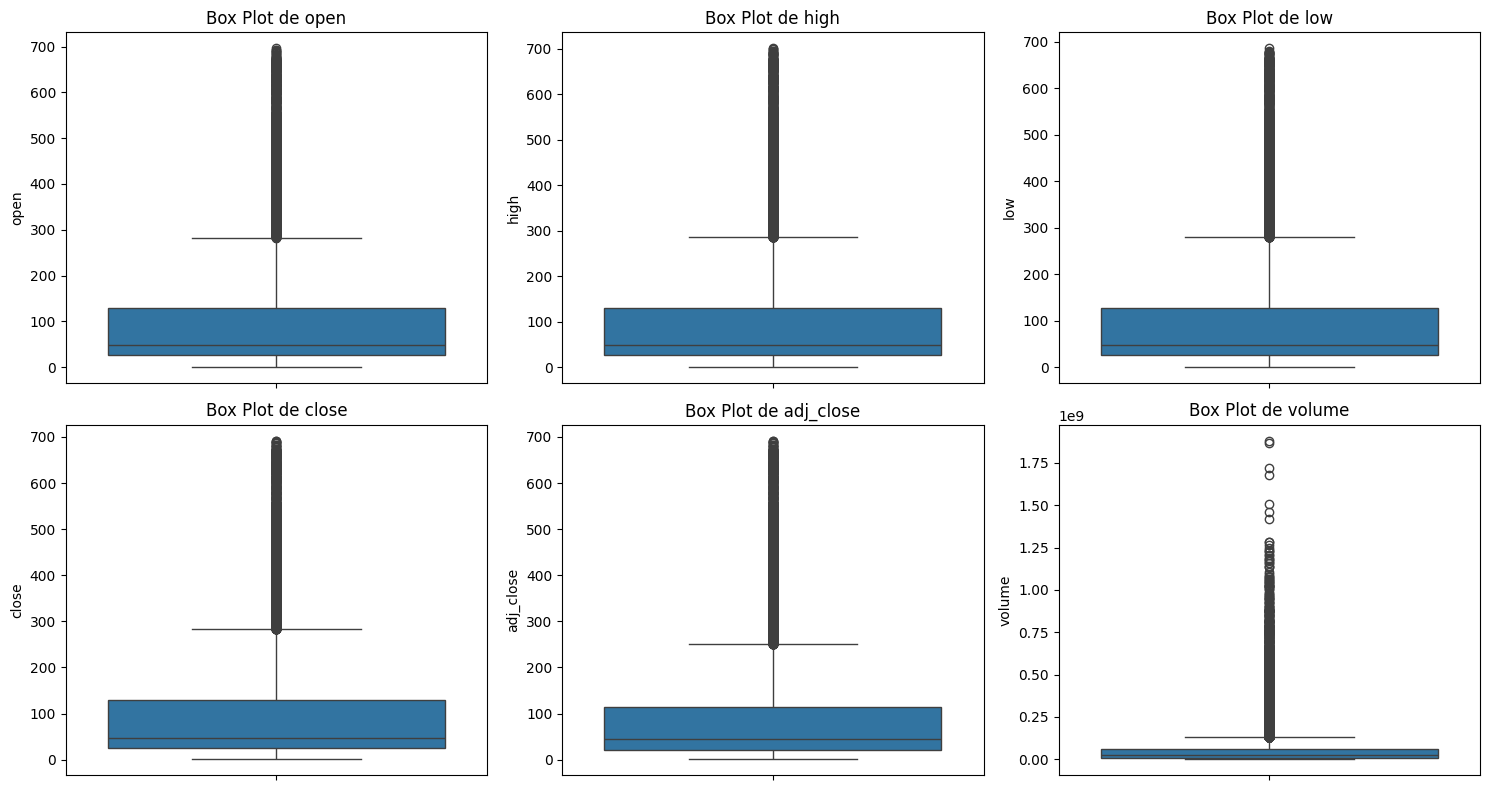

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Usaremos el DataFrame 'prices_filtered' (que ya no tiene nulos ni inconsistencias básicas)
# Seleccionar las variables numéricas a visualizar
columnas_numericas = ["open", "high", "low", "close", "adj_close", "volume"]

# Crear box plots para cada columna numérica
plt.figure(figsize=(15, 8))
for i, col in enumerate(columnas_numericas):
    plt.subplot(2, 3, i + 1) # Crea una cuadrícula de 2 filas y 3 columnas
    sns.boxplot(y=prices_filtered[col])
    plt.title(f'Box Plot de {col}')
    plt.ylabel(col)

plt.tight_layout() # Ajusta el diseño para evitar superposiciones
plt.show()

### analizar el impacto de los outliers en esas métricas.

Este código carga tus datos de precios, calcula la media y la mediana de una columna numérica, luego simula la eliminación de los outliers detectados por el método IQR y vuelve a calcular la media y la mediana para mostrarte cuánto cambian. Te ayuda a analizar el impacto de los outliers en esas métricas.

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Seleccionar una columna para el análisis (ej: 'close')
columna_analisis = 'close'

# Calcular la media y mediana con todos los datos
media_todos = prices_filtered[columna_analisis].mean()
mediana_todos = prices_filtered[columna_analisis].median()

print(f"Métricas para '{columna_analisis}' (con todos los datos):")
print(f"  Media   : {media_todos:.2f}")
print(f"  Mediana : {mediana_todos:.2f}")

# --- Simular eliminación de outliers usando IQR para el análisis ---
# Calcular los umbrales IQR
Q1 = prices_filtered[columna_analisis].quantile(0.25)
Q3 = prices_filtered[columna_analisis].quantile(0.75)
IQR = Q3 - Q1
umbral_inferior = Q1 - 1.5 * IQR
umbral_superior = Q3 + 1.5 * IQR

# Filtrar datos (simulando la eliminación)
df_sin_outliers_simulado = prices_filtered[
    (prices_filtered[columna_analisis] >= umbral_inferior) &
    (prices_filtered[columna_analisis] <= umbral_superior)
].copy() # Usamos .copy() para evitar SettingWithCopyWarning


# Calcular la media y mediana sin los outliers simulados
media_sin_outliers = df_sin_outliers_simulado[columna_analisis].mean()
mediana_sin_outliers = df_sin_outliers_simulado[columna_analisis].median()

print(f"\nMétricas para '{columna_analisis}' (simulando eliminación de outliers IQR):")
print(f"  Media   : {media_sin_outliers:.2f}")
print(f"  Mediana : {mediana_sin_outliers:.2f}")

# Comparar el impacto
print(f"\nImpacto de los outliers en la Media: {media_todos - media_sin_outliers:.2f}")
print(f"Impacto de los outliers en la Mediana: {mediana_todos - mediana_sin_outliers:.2f}")

Métricas para 'close' (con todos los datos):
  Media   : 89.27
  Mediana : 47.97

Métricas para 'close' (simulando eliminación de outliers IQR):
  Media   : 70.54
  Mediana : 44.96

Impacto de los outliers en la Media: 18.74
Impacto de los outliers en la Mediana: 3.01


"Analizar el impacto de los outliers".

El código en la celda f4cb5bac te ayuda con esto. Lo que hace es lo siguiente:

Calcula la media y la mediana del precio de cierre (close) utilizando todos los datos, incluyendo los outliers.
Simula la eliminación de outliers basándose en el método IQR (Rango Intercuartílico) para una columna seleccionada (por defecto, 'close'). Crea un DataFrame temporal df_sin_outliers_simulado que excluye los valores fuera del rango IQR.
Calcula la media y la mediana nuevamente, pero esta vez usando solo los datos de df_sin_outliers_simulado (sin los outliers simulados).
Compara las métricas: Finalmente, muestra la diferencia entre la media y la mediana calculadas con y sin los outliers simulados.
¿Por qué es útil esto?

Al comparar cómo cambian la media y la mediana cuando "quitas" los outliers, puedes ver cuánto están afectando estos valores extremos a tus estadísticas descriptivas.

Si la media cambia significativamente, te indica que los outliers están sesgando el promedio.
Si la mediana (que es menos sensible a los extremos) cambia menos, refuerza la idea de que los outliers son los que están distorsionando la media.
En resumen, este código te permite cuantificar el impacto que tienen los valores atípicos en tus métricas centrales, incluso si decides conservarlos en tu análisis principal.

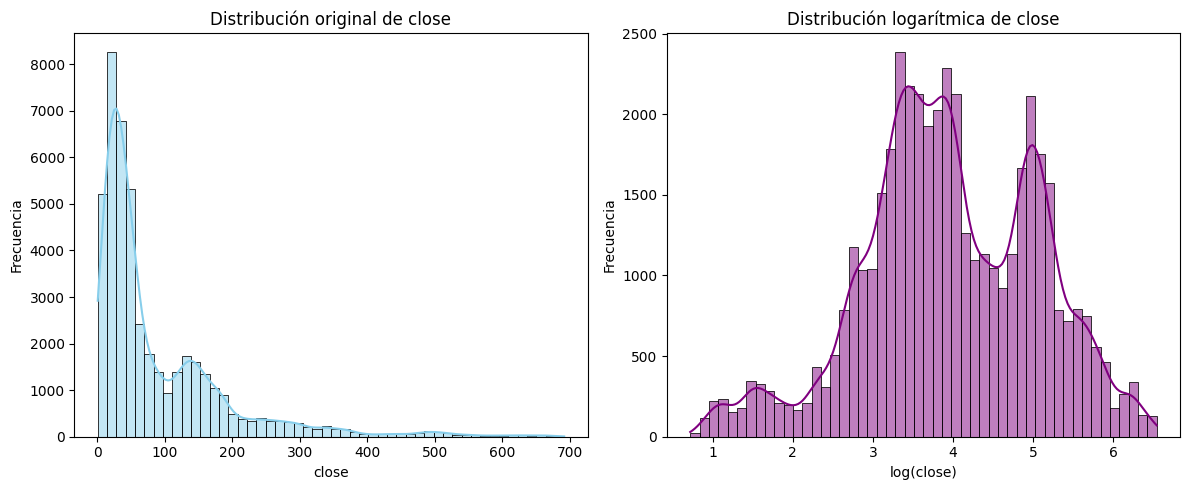

Primeros 5 valores de la columna 'log_close':
      close  log_close
0  7.643214   2.156775
1  7.656429   2.158302
2  7.534643   2.144134
3  7.520714   2.142500
4  7.570714   2.148351


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Seleccionar una columna numérica para transformar (ej: 'close')
columna_transformar = 'close'

# Aplicar transformación logarítmica (agrega 1 para manejar valores cero si los hubiera)
# Aunque en este dataset no hay ceros en 'close', es una buena práctica general
merged[f'log_{columna_transformar}'] = np.log1p(merged[columna_transformar])


# Visualizar la distribución antes y después de la transformación
plt.figure(figsize=(12, 5))

# Distribución original
plt.subplot(1, 2, 1)
sns.histplot(merged[columna_transformar], bins=50, kde=True, color="skyblue")
plt.title(f'Distribución original de {columna_transformar}')
plt.xlabel(columna_transformar)
plt.ylabel("Frecuencia")

# Distribución después de la transformación logarítmica
plt.subplot(1, 2, 2)
sns.histplot(merged[f'log_{columna_transformar}'], bins=50, kde=True, color="purple")
plt.title(f'Distribución logarítmica de {columna_transformar}')
plt.xlabel(f'log({columna_transformar})')
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

# Mostrar los primeros valores de la nueva columna
print(f"Primeros 5 valores de la columna '{f'log_{columna_transformar}'}':")
print(merged[[columna_transformar, f'log_{columna_transformar}']].head())

este código aplica una transformación matemática a una columna numérica para reducir su asimetría y luego te muestra visualmente cómo cambia la distribución. Esto es útil si necesitas que tus datos sean más simétricos para un análisis posterior, sin tener que eliminar los valores extremos.

## Verificar y cambiar tipos de datos

Este código carga tus datos de precios, revisa qué tipo de información tiene cada columna (números, texto, fechas) y si alguna columna que debería ser numérica o de fecha está como texto, intenta convertirla automáticamente.

In [12]:
# 📌 4.1.7 Verificar y cambiar tipos de datos

import pandas as pd
import os

# Define the path to the file without duplicates
output_dir = "/content/drive/MyDrive/3erproyectocarmen/datos_extraidos_3erproyecto"
prices_no_duplicates_path_xlsx = os.path.join(output_dir, "big_tech_stock_prices_sinduplicados.xlsx")

# Load the data from the file without duplicates
try:
    prices_clean_types = pd.read_excel(prices_no_duplicates_path_xlsx, parse_dates=["date"]) # Load the data and parse dates initially
    print("✅ Archivo sin duplicados cargado para verificación de tipos de datos.")

    # 1️⃣ Revisar los tipos de datos actuales
    print("\n📊 Tipos de datos actuales:")
    print(prices_clean_types.dtypes)

    # 2️⃣ Intentar convertir columnas automáticamente
    # (ej: columnas que parecen fechas o numéricas pero están como objeto)
    # Note: Since parse_dates=["date"] was used during loading, 'date' should already be datetime.
    # The loop below will attempt conversion for other 'object' columns if any exist.
    for col in prices_clean_types.columns:
        if prices_clean_types[col].dtype == "object":
            try:
                # Intentar convertir a fecha
                prices_clean_types[col] = pd.to_datetime(prices_clean_types[col])
                print(f"✅ Columna '{col}' convertida a fecha")
            except:
                try:
                    # Intentar convertir a número
                    prices_clean_types[col] = pd.to_numeric(prices_clean_types[col])
                    print(f"✅ Columna '{col}' convertida a numérico")
                except:
                    print(f"⚠️ Columna '{col}' se mantiene como texto")

    # 3️⃣ Verificar nuevamente los tipos de datos
    print("\n📊 Tipos de datos después de la conversión:")
    print(prices_clean_types.dtypes)

except FileNotFoundError:
    print(f"Error: No se encontró el archivo sin duplicados en {prices_no_duplicates_path_xlsx}. Asegúrate de que se guardó correctamente.")
except Exception as e:
    print(f"Ocurrió un error al cargar o verificar tipos de datos: {e}")

✅ Archivo sin duplicados cargado para verificación de tipos de datos.

📊 Tipos de datos actuales:
stock_symbol            object
date            datetime64[ns]
open                   float64
high                   float64
low                    float64
close                  float64
adj_close              float64
volume                 float64
dtype: object
⚠️ Columna 'stock_symbol' se mantiene como texto

📊 Tipos de datos después de la conversión:
stock_symbol            object
date            datetime64[ns]
open                   float64
high                   float64
low                    float64
close                  float64
adj_close              float64
volume                 float64
dtype: object


/tmp/ipython-input-4148273178.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  prices_clean_types[col] = pd.to_datetime(prices_clean_types[col])


Preguntas de pensamiento crítico 💡

¿Qué impacto tiene un tipo de dato incorrecto en mi análisis?
👉 Puede distorsionar resultados (ejemplo: fechas tratadas como texto no permiten cálculos de periodos; números como texto no se pueden sumar).

¿Cómo garantizar que se mantenga el tipo correcto en futuras importaciones?
👉 Definir explícitamente los tipos al cargar (pd.read_csv(..., dtype=...) o parse_dates=[...]) y documentar la estructura de datos esperada.

## Unir tabla

Este código carga tus archivos de datos limpios, se asegura de que la columna para unir (stock_symbol) sea texto en ambos, une las tablas de precios y empresas basándose en esa columna (solo si coinciden) y te muestra un adelanto de la tabla combinada resultante.

In [13]:
import pandas as pd
import os

# Define the directory where the cleaned files are located
output_dir = "/content/drive/MyDrive/3erproyectocarmen/datos_extraidos_3erproyecto"

# Define the paths for the cleaned files
companies_clean_path = os.path.join(output_dir, "big_tech_companies_sinnulos.csv")
prices_clean_path = os.path.join(output_dir, "big_tech_stock_prices_sinduplicados.xlsx")

# Load the cleaned dataframes
try:
    companies_clean = pd.read_csv(companies_clean_path)
    prices_clean = pd.read_excel(prices_clean_path, parse_dates=["date"]) # Parse dates when loading prices

    print("✅ Cleaned files loaded successfully.")

    # 🔵 Unir precios con información de empresas usando 'stock_symbol'
    # Ensure stock_symbol is the same type in both dataframes before merging
    companies_clean['stock_symbol'] = companies_clean['stock_symbol'].astype(str)
    prices_clean['stock_symbol'] = prices_clean['stock_symbol'].astype(str)


    merged_clean = pd.merge(
        prices_clean,
        companies_clean,
        on="stock_symbol",   # clave común
        how="inner"          # solo los símbolos que estén en ambas tablas
    )

    print("\n📊 Preview de la tabla unida limpia:")
    display(merged_clean.head())

except FileNotFoundError:
    print("Error: No se encontraron los archivos limpios. Asegúrate de que se guardaron correctamente.")
except Exception as e:
    print(f"Ocurrió un error al cargar, unir o procesar los archivos: {e}")

✅ Cleaned files loaded successfully.

📊 Preview de la tabla unida limpia:


,stock_symbol,date,open,high,low,close,adj_close,volume,company
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600.0,Apple Inc.
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800.0,Apple Inc.
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000.0,Apple Inc.
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200.0,Apple Inc.
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800.0,Apple Inc.


Este código guarda la tabla combinada y limpia de tus datos (merged_clean) en un nuevo archivo de Excel llamado big_tech_merged_clean.xlsx en la carpeta que definiste en tu Google Drive.

In [ ]:
import os

# Define the directory to save the merged file
output_dir = "/content/drive/MyDrive/3erproyectocarmen/datos_extraidos_3erproyecto"

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Define the path for the merged file
merged_output_path_xlsx = os.path.join(output_dir, "big_tech_merged_clean.xlsx")

# Save the merged_clean DataFrame to a new XLSX file
# Assuming merged_clean DataFrame is available from a previous cell
if 'merged_clean' in globals():
    merged_clean.to_excel(merged_output_path_xlsx, index=False)
    print(f"✅ Saved cleaned and merged data to: {merged_output_path_xlsx}")
else:
    print("⚠️ 'merged_clean' DataFrame not found. Skipping saving merged data.")

✅ Saved cleaned and merged data to: /content/drive/MyDrive/3erproyectocarmen/datos_extraidos_3erproyecto/big_tech_merged_clean.xlsx


## Agrupar datos según variables categóricas

Este código carga tu tabla combinada y limpia, la divide por nombre de empresa y calcula el precio promedio y el volumen promedio para cada una. También te da un resumen estadístico más completo para cada empresa.

In [14]:
import pandas as pd
import os

# Define the path to the cleaned and merged file
output_dir = "/content/drive/MyDrive/3erproyectocarmen/datos_extraidos_3erproyecto"
merged_clean_path_xlsx = os.path.join(output_dir, "big_tech_merged_clean.xlsx")

# Load the cleaned and merged data
try:
    merged_clean = pd.read_excel(merged_clean_path_xlsx, parse_dates=["date"]) # Load the merged data

    print("✅ Archivo unido y limpio cargado correctamente.")

    # 🟣 Agrupar por nombre de empresa y calcular métricas clave
    grouped_company = merged_clean.groupby("company").agg({
        "open": "mean",
        "high": "mean",
        "low": "mean",
        "close": "mean",
        "adj_close": "mean",
        "volume": "mean"
    }).reset_index()

    print("\n📊 Media de precios y volumen por empresa:")
    display(grouped_company) # Using display for better formatting

    # 🟣 Resumen estadístico por grupos
    summary_company = merged_clean.groupby("company")[["open","high","low","close","volume"]].describe()
    print("\n📊 Resumen estadístico por empresa:")
    display(summary_company) # Using display for better formatting

except FileNotFoundError:
    print(f"Error: No se encontró el archivo unido y limpio en {merged_clean_path_xlsx}. Asegúrate de que se guardó correctamente.")
except Exception as e:
    print(f"Ocurrió un error al cargar, agrupar o procesar los archivos: {e}")

✅ Archivo unido y limpio cargado correctamente.

📊 Media de precios y volumen por empresa:


,company,open,high,low,close,adj_close,volume
0,Adobe Inc.,186.023938,188.208985,183.621944,186.022299,186.022299,3.814337e+06
1,Alphabet Inc.,49.149625,49.638485,48.641724,49.148954,49.148954,6.018647e+07
2,"Amazon.com, Inc.",58.937204,59.610805,58.183281,58.905287,58.905287,8.833999e+07
3,Apple Inc.,51.274171,51.845876,50.708548,51.297154,49.445122,2.563255e+08
4,"Cisco Systems, Inc.",33.493880,33.804014,33.186717,33.502262,28.624463,3.269656e+07
5,Intel Corporation,36.481406,36.875197,36.093201,36.492317,31.310983,3.607170e+07
6,International Business Machines Corporation,148.427471,149.571376,147.340861,148.474615,113.148579,5.036545e+06
7,"Meta Platforms, Inc.",147.874275,149.757980,146.003795,147.913244,147.913244,3.117815e+07
8,Microsoft Corporation,100.048490,101.039621,99.007967,100.072644,95.285446,3.801647e+07
9,NVIDIA Corporation,50.560335,51.504697,49.546073,50.555529,50.282939,5.080613e+07



📊 Resumen estadístico por empresa:


open                          \
                                              count        mean         std   
company                                                                       
Adobe Inc.                                   3271.0  186.023938  173.562115   
Alphabet Inc.                                3271.0   49.149625   35.809816   
Amazon.com, Inc.                             3271.0   58.937204   54.138607   
Apple Inc.                                   3271.0   51.274171   47.316509   
Cisco Systems, Inc.                          3271.0   33.493880   12.643887   
Intel Corporation                            3271.0   36.481406   12.912534   
International Business Machines Corporation  3271.0  148.427471   23.998357   
Meta Platforms, Inc.                         2688.0  147.874275   86.734656   
Microsoft Corporation                        3271.0  100.048490   88.228008   
NVIDIA Corporation                           3271.0   50.560335   69.538684   
Netflix, Inc.                                3271.0  188.242206  178.967463   
Oracle Corporation                           3271.0   46.242177   16.864193   
Salesforce, Inc.                             3271.0  103.419948   71.287894   
Tesla, Inc.                                  3149.0   58.869123   95.663619   

                                                                    \
                                                   min         25%   
company                                                              
Adobe Inc.                                   22.969999   42.765000   
Alphabet Inc.                                10.968719   20.262137   
Amazon.com, Inc.                              5.296500   13.343750   
Apple Inc.                                    6.870357   18.965894   
Cisco Systems, Inc.                          13.930000   22.910000   
Intel Corporation                            17.879999   24.650000   
International Business Machines Corporation  90.439774  129.641487   
Meta Platforms, Inc.                         18.080000   77.967500   
Microsoft Corporation                        23.090000   31.804999   
NVIDIA Corporation                            2.180000    3.997500   
Netflix, Inc.                                 6.960000   34.612143   
Oracle Corporation                           21.459999   33.410000   
Salesforce, Inc.                             15.522500   42.343750   
Tesla, Inc.                                   1.076000    8.986667   

                                                                     \
                                                    50%         75%   
company                                                               
Adobe Inc.                                    97.589996  289.169998   
Alphabet Inc.                                 38.521000   61.757750   
Amazon.com, Inc.                              36.325001   93.025002   
Apple Inc.                                    29.745001   56.897499   
Cisco Systems, Inc.                           29.500000   44.990000   
Intel Corporation                             34.270000   48.079999   
International Business Machines Corporation  143.173996  167.160614   
Meta Platforms, Inc.                         141.620002  191.070000   
Microsoft Corporation                         55.660000  139.514999   
NVIDIA Corporation                            11.902500   62.131251   
Netflix, Inc.                                110.010002  328.790009   
Oracle Corporation                            41.750000   53.680000   
Salesforce, Inc.                              76.290001  155.065002   
Tesla, Inc.                                   16.238667   24.628000   

                                                           high              \
                                                    max   count        mean   
company                                                                       
Adobe Inc.                                   696.280029  3271.0  18

Cómo abordar las preguntas de pensamiento crítico:

Estas preguntas son fundamentales para interpretar correctamente los resultados de la agrupación:

¿Cómo influye la elección de la variable categórica en el análisis de los grupos?
La variable que elijas define los "segmentos" de tus datos que vas a comparar. Si agrupas por "company", comparas el comportamiento de las acciones entre empresas. Si tuvieras una columna de "sector industrial", agruparías para comparar sectores. La elección debe estar alineada con tu objetivo de análisis. Una variable con demasiadas categorías (como un ID único) o muy pocas puede no ser útil.
¿Las agrupaciones tienen sentido en el contexto del problema?
Debes preguntarte si tiene lógica agrupar los datos por esa variable. En el caso de acciones, agrupar por empresa tiene mucho sentido porque cada empresa tiene su propio comportamiento en el mercado. Agrupar por una columna irrelevante (como un número de fila) no tendría sentido.
¿Los datos de cada grupo son lo suficientemente homogéneos para hacer comparaciones significativas?
Aquí analizas si los datos dentro de cada grupo son similares entre sí. Si un grupo tiene datos muy dispersos o con outliers extremos, la media podría no ser la mejor métrica para representarlo. El resumen estadístico (.describe()) te ayuda a ver la dispersión (desviación estándar, rango intercuartílico) dentro de cada grupo. Si los grupos son muy heterogéneos, quizás necesites analizarlos por separado o usar métricas más robustas (como la mediana). En nuestro ejemplo, el describe() para cada empresa te muestra esa variabilidad.
En resumen, el código te da la herramienta para agrupar, pero las preguntas de pensamiento crítico te guían para interpretar si esa agrupación es útil y significativa para tu análisis.

## Analizar variables categóricas

El código primero cuenta cuántas filas corresponden a cada empresa y luego usa esos conteos para crear dos visualizaciones: un gráfico de barras que muestra la cantidad absoluta de registros por empresa, y un gráfico circular que muestra la proporción de registros de cada empresa con respecto al total. Esto te ayuda a ver rápidamente si tus datos están distribuidos de manera uniforme entre las empresas.

Como vimos en los resultados, la mayoría de las empresas tienen un número de registros muy similar, lo cual es bueno para asegurar que las comparaciones entre ellas sean justas, aunque Tesla y Meta tienen un poco menos de datos.

✅ Archivo unido y limpio cargado correctamente para análisis categórico.


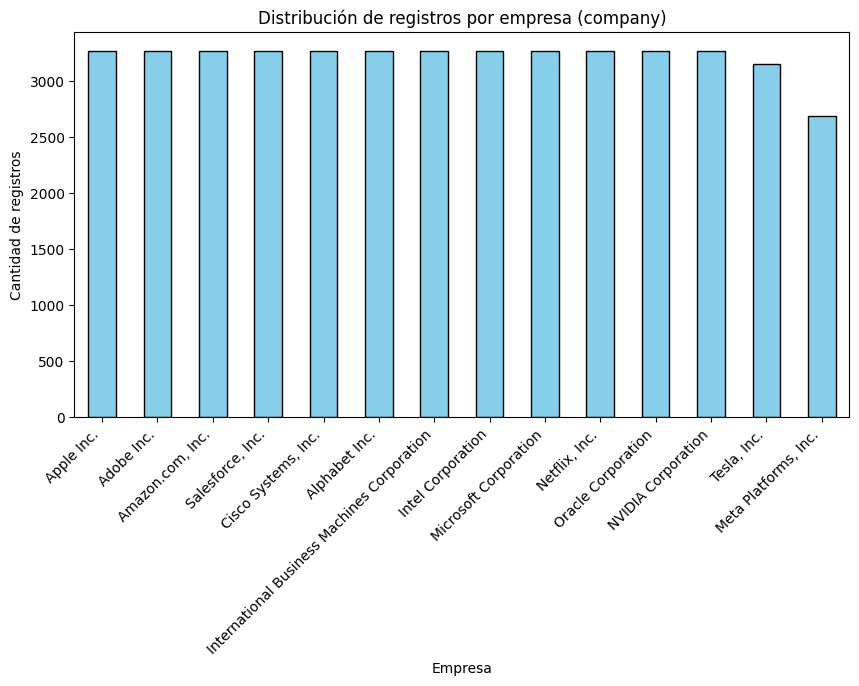

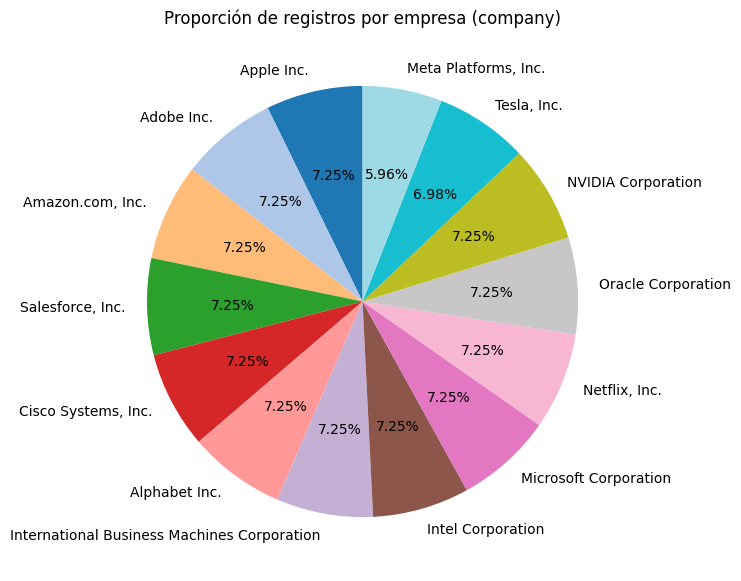

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the path to the cleaned and merged file
output_dir = "/content/drive/MyDrive/3erproyectocarmen/datos_extraidos_3erproyecto"
merged_clean_path_xlsx = os.path.join(output_dir, "big_tech_merged_clean.xlsx")

# Load the cleaned and merged data
try:
    merged_clean = pd.read_excel(merged_clean_path_xlsx, parse_dates=["date"]) # Load the merged data

    print("✅ Archivo unido y limpio cargado correctamente para análisis categórico.")

    # 📊 Conteo de registros por empresa
    counts = merged_clean["company"].value_counts()

    # 🔵 Gráfico de barras
    plt.figure(figsize=(10,5))
    counts.plot(kind="bar", color="skyblue", edgecolor="black")
    plt.title("Distribución de registros por empresa (company)")
    plt.xlabel("Empresa")
    plt.ylabel("Cantidad de registros")
    plt.xticks(rotation=45, ha="right")
    plt.show()

    # 🟣 Gráfico circular
    plt.figure(figsize=(7,7))
    counts.plot(kind="pie", autopct="%.2f%%", startangle=90, cmap="tab20")
    plt.title("Proporción de registros por empresa (company)")
    plt.ylabel("")  # Quitar etiqueta del eje Y
    plt.show()

except FileNotFoundError:
    print(f"Error: No se encontró el archivo unido y limpio en {merged_clean_path_xlsx}. Asegúrate de que se guardó correctamente.")
except Exception as e:
    print(f"Ocurrió un error al cargar o procesar el archivo para análisis categórico: {e}")

El código primero cuenta cuántas filas corresponden a cada empresa y luego usa esos conteos para crear dos visualizaciones: un gráfico de barras que muestra la cantidad absoluta de registros por empresa, y un gráfico circular que muestra la proporción de registros de cada empresa con respecto al total. Esto te ayuda a ver rápidamente si tus datos están distribuidos de manera uniforme entre las empresas.

Como vimos en los resultados, la mayoría de las empresas tienen un número de registros muy similar, lo cual es bueno para asegurar que las comparaciones entre ellas sean justas, aunque Tesla y Meta tienen un poco menos de datos.

## Calcular medidas de tendencia central

Este código calcula las medidas de tendencia central (media, mediana, moda) para una columna numérica de tus datos, mostrándote el valor promedio, el valor central y el valor más frecuente.

In [16]:
from scipy import stats
import pandas as pd # Importar pandas si aún no está importado globally

# Seleccionamos la variable a analizar
columna = "close"

# Verificar si 'merged_clean' existe, si no, cargarla
if 'merged_clean' not in globals():
    try:
        output_dir = "/content/drive/MyDrive/3erproyectocarmen/datos_extraidos_3erproyecto"
        merged_clean_path_xlsx = os.path.join(output_dir, "big_tech_merged_clean.xlsx")
        merged_clean = pd.read_excel(merged_clean_path_xlsx, parse_dates=["date"])
        print("✅ Archivo unido y limpio cargado correctamente para medidas de tendencia central.")
    except FileNotFoundError:
        print(f"Error: No se encontró el archivo unido y limpio en {merged_clean_path_xlsx}. Asegúrate de que se guardó correctamente.")
        merged_clean = None # Set to None if loading fails
    except Exception as e:
        print(f"Ocurrió un error al cargar el archivo: {e}")
        merged_clean = None # Set to None if loading fails


if merged_clean is not None:
    media = merged_clean[columna].mean()
    mediana = merged_clean[columna].median()
    # La moda puede devolver varias, tomamos la primera si existe
    moda_series = merged_clean[columna].mode()
    moda = moda_series[0] if not moda_series.empty else "No hay moda única"


    print(f"📊 Medidas de tendencia central para '{columna}':")
    print(f"👉 Media   : {media:.2f}")
    print(f"👉 Mediana : {mediana:.2f}")
    print(f"👉 Moda    : {moda:.2f}" if isinstance(moda, (int, float)) else f"👉 Moda    : {moda}")
else:
    print("No se pudo calcular las medidas de tendencia central porque el DataFrame 'merged_clean' no está disponible.")

📊 Medidas de tendencia central para 'close':
👉 Media   : 89.27
👉 Mediana : 47.97
👉 Moda    : 24.70


🔎 Interpretación

La media (89.27) es bastante más alta que la mediana (47.97) → esto sugiere que hay valores atípicos altos (outliers) que están empujando la media hacia arriba.

La mediana (47.97) refleja mejor el “valor típico” del precio de cierre, ya que no se ve tan afectada por los extremos.

La moda (24.70) indica el valor más repetido, pero en variables continuas como los precios de acciones puede tener poca relevancia (no siempre aporta mucho valor interpretativo).

❓ Preguntas de pensamiento crítico

¿Es la media la mejor medida?

Probablemente no, porque está distorsionada por outliers.

La mediana parece más adecuada para describir el comportamiento central del precio de cierre.

¿La moda aporta información útil?

En este caso, no demasiado: en precios de acciones no suele repetirse un mismo valor con frecuencia significativa.

La moda sería más relevante en variables categóricas o discretas (ej. sector, rating).

¿Cómo ayudan estas medidas a resumir los datos?

Te permiten comparar rápidamente el “valor típico” (mediana), el “promedio general” (media) y el “más frecuente” (moda).

Además, al ver la diferencia entre media y mediana puedes detectar posibles sesgos o outliers.

## Visualizar la distribución de variables numéricas

Este código genera un histograma y un gráfico de densidad para mostrarte visualmente cómo se distribuyen los valores de una columna numérica específica. Te ayuda a ver la forma de la distribución y dónde se concentran los datos.

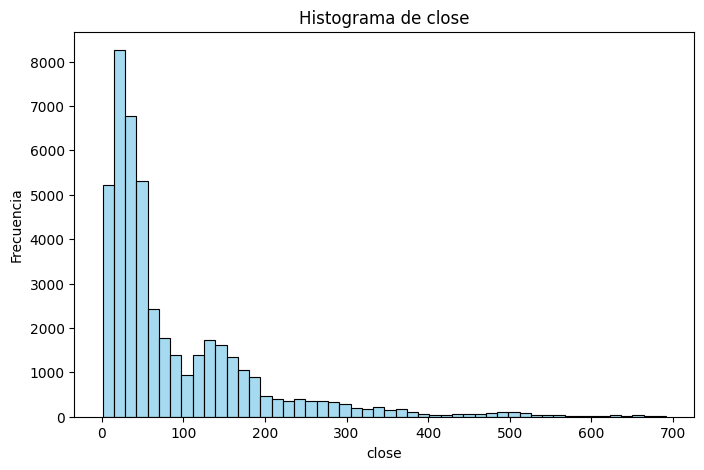

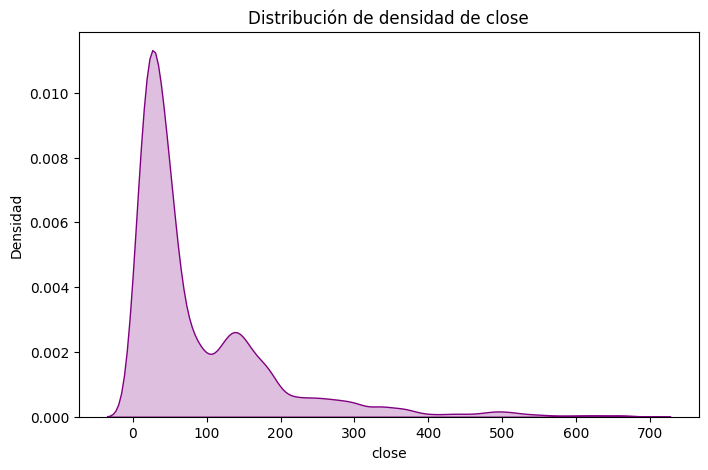

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported for reading excel
import os # Ensure os is imported for file paths


columna = "close"

# Load the latest merged_clean dataframe if it's not in the global scope
if 'merged_clean' not in globals():
    try:
        output_dir = "/content/drive/MyDrive/3erproyectocarmen/datos_extraidos_3erproyecto"
        merged_clean_path_xlsx = os.path.join(output_dir, "big_tech_merged_clean.xlsx")
        merged_clean = pd.read_excel(merged_clean_path_xlsx, parse_dates=["date"])
        print("✅ Archivo unido y limpio cargado correctamente para visualización de distribución.")
    except FileNotFoundError:
        print(f"Error: No se encontró el archivo unido y limpio en {merged_clean_path_xlsx}. Asegúrate de que se guardó correctamente.")
        merged_clean = None # Set to None if loading fails
    except Exception as e:
        print(f"Ocurrió un error al cargar el archivo: {e}")
        merged_clean = None # Set to None if loading fails


if merged_clean is not None:
    # 📊 Histograma
    plt.figure(figsize=(8,5))
    sns.histplot(merged_clean[columna], bins=50, kde=False, color="skyblue", edgecolor="black")
    plt.title(f"Histograma de {columna}")
    plt.xlabel(columna)
    plt.ylabel("Frecuencia")
    plt.show()

    # 🟣 Gráfico de densidad
    plt.figure(figsize=(8,5))
    sns.kdeplot(merged_clean[columna], fill=True, color="purple")
    plt.title(f"Distribución de densidad de {columna}")
    plt.xlabel(columna)
    plt.ylabel("Densidad")
    plt.show()
else:
    print("No se pudo generar los gráficos porque el DataFrame 'merged_clean' no está disponible.")

❓ Preguntas de pensamiento crítico

¿La distribución sigue un patrón esperado (normal, exponencial, etc.)?

No es normal: se observa una asimetría positiva (cola larga a la derecha).

Esto es común en precios de acciones, ya que la mayoría se concentran en valores bajos o medios, pero unas pocas alcanzan precios muy altos.

¿Hay asimetrías que indiquen la presencia de valores atípicos o problemas en los datos?

Sí, la cola larga hacia la derecha refleja la existencia de valores extremos (outliers).

Sin embargo, no parecen errores, sino eventos reales (empresas como Amazon o Google tienen precios históricamente más altos que otras como Intel o Meta).

¿Cómo influye esta distribución en la elección del análisis o modelo?

La asimetría indica que la media no es una buena medida central → conviene usar la mediana.

Para modelos estadísticos o de machine learning, puede ser útil aplicar una transformación logarítmica a los precios para reducir la asimetría.

Comparar empresas directamente sin ajustar podría ser injusto (una empresa con acciones muy caras domina la escala).

## Calcular medidas de dispersión

Este código calcula la desviación estándar, la varianza y el rango intercuartílico (IQR) para una columna numérica de tus datos. Estas medidas te indican qué tan dispersos o variables están los datos.

In [18]:
import numpy as np
import pandas as pd # Importar pandas si aún no está importado globally
import os # Importar os para rutas de archivo

# Variable numérica a analizar
columna = "close"

# Verificar si 'merged_clean' existe, si no, cargarla
if 'merged_clean' not in globals():
    try:
        output_dir = "/content/drive/MyDrive/3erproyectocarmen/datos_extraidos_3erproyecto"
        merged_clean_path_xlsx = os.path.join(output_dir, "big_tech_merged_clean.xlsx")
        merged_clean = pd.read_excel(merged_clean_path_xlsx, parse_dates=["date"])
        print("✅ Archivo unido y limpio cargado correctamente para medidas de dispersión.")
    except FileNotFoundError:
        print(f"Error: No se encontró el archivo unido y limpio en {merged_clean_path_xlsx}. Asegúrate de que se guardó correctamente.")
        merged_clean = None # Set to None if loading fails
    except Exception as e:
        print(f"Ocurrió un error al cargar el archivo: {e}")
        merged_clean = None # Set to None if loading fails

if merged_clean is not None:
    # Calcular medidas de dispersión
    desviacion = merged_clean[columna].std()
    varianza = merged_clean[columna].var()
    q1 = merged_clean[columna].quantile(0.25)
    q3 = merged_clean[columna].quantile(0.75)
    iqr = q3 - q1

    # Mostrar resultados
    print(f"📊 Medidas de dispersión para '{columna}':")
    print(f"👉 Desviación estándar : {desviacion:.2f}")
    print(f"👉 Varianza            : {varianza:.2f}")
    print(f"👉 Rango intercuartílico (IQR) : {iqr:.2f}")
else:
    print("No se pudo calcular las medidas de dispersión porque el DataFrame 'merged_clean' no está disponible.")

📊 Medidas de dispersión para 'close':
👉 Desviación estándar : 101.59
👉 Varianza            : 10320.89
👉 Rango intercuartílico (IQR) : 102.98


📊 Medidas de dispersión para close:

Desviación estándar: 101.59

Varianza: 10,320.69

Rango intercuartílico (IQR): 102.98

🔎 Interpretación:

Desviación estándar (101.59)
→ Indica que, en promedio, los valores de close se desvían ±101 unidades respecto a la media (89.27). Esto es bastante alto en comparación con la media, lo que confirma gran variabilidad.

Varianza (10,320.69)
→ Es la medida cuadrática de la dispersión. Un valor grande refleja que los precios están muy dispersos.

IQR (102.98)
→ El 50% central de los datos está en un rango de ~103 unidades, lo que significa que, incluso entre la mayoría de valores, existe bastante dispersión.

❓ Preguntas de pensamiento crítico:

¿Es la desviación estándar la medida más apropiada o sería mejor el IQR debido a outliers?
👉 El IQR es más robusto porque no se ve afectado por valores extremos, mientras que la desviación estándar sí. Dado que ya detectamos outliers, el IQR sería más confiable para resumir la dispersión real.

¿Qué me dice la dispersión sobre la confiabilidad de mis datos?
👉 Que los precios de cierre no son consistentes y muestran gran variabilidad. Esto puede reflejar volatilidad natural del mercado (real) o la presencia de datos atípicos (error).

¿La variabilidad observada afecta las conclusiones del análisis?
👉 Sí, porque al haber tanta dispersión, los promedios (como la media) pueden estar sesgados. Será más adecuado complementar con la mediana y analizar grupos (por empresa o periodo) para no generalizar en exceso.

## Calcular correlaciones

📊 Matriz de correlaciones (Pearson):


,open,high,low,close,adj_close,volume
open,1.000000,0.999856,0.999827,0.999677,0.994481,-0.224519
high,0.999856,1.000000,0.999761,0.999837,0.994871,-0.223344
low,0.999827,0.999761,1.000000,0.999841,0.994350,-0.226070
close,0.999677,0.999837,0.999841,1.000000,0.994783,-0.224695
adj_close,0.994481,0.994871,0.994350,0.994783,1.000000,-0.213404
volume,-0.224519,-0.223344,-0.226070,-0.224695,-0.213404,1.000000


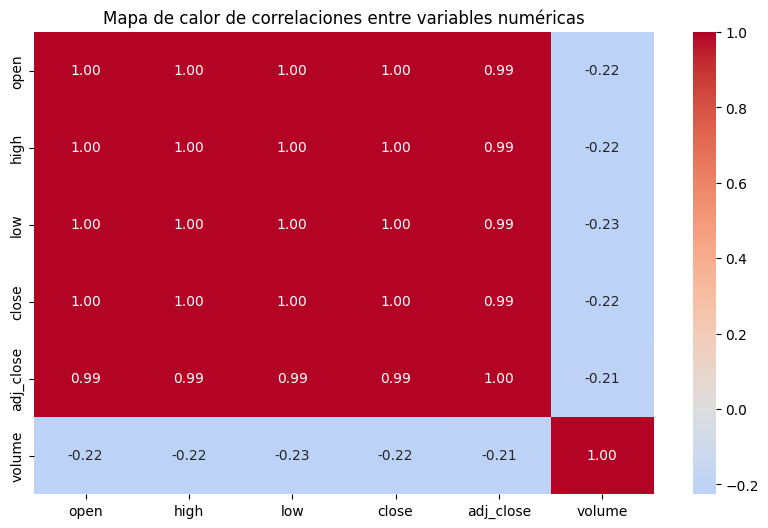

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os # Import os for file paths

# Verify if 'merged_clean' exists, if not, load it
if 'merged_clean' not in globals():
    try:
        output_dir = "/content/drive/MyDrive/3erproyectocarmen/datos_extraidos_3erproyecto"
        merged_clean_path_xlsx = os.path.join(output_dir, "big_tech_merged_clean.xlsx")
        merged_clean = pd.read_excel(merged_clean_path_xlsx, parse_dates=["date"])
        print("✅ Archivo unido y limpio cargado correctamente para cálculo de correlaciones.")
    except FileNotFoundError:
        print(f"Error: No se encontró el archivo unido y limpio en {merged_clean_path_xlsx}. Asegúrate de que se guardó correctamente.")
        merged_clean = None # Set to None if loading fails
    except Exception as e:
        print(f"Ocurrió un error al cargar el archivo: {e}")
        merged_clean = None # Set to None if loading fails

if merged_clean is not None:
    # Seleccionar solo variables numéricas
    # Excluir 'year' si existe y no es relevante para la correlación de precios/volumen
    numeric_data = merged_clean.select_dtypes(include=[np.number])
    # Optionally drop the 'year' column if it was added for other analysis
    if 'year' in numeric_data.columns:
        numeric_data = numeric_data.drop(columns=['year'])


    # Calcular la correlación de Pearson
    corr_matrix = numeric_data.corr(method='pearson')

    # Mostrar la matriz
    print("📊 Matriz de correlaciones (Pearson):")
    display(corr_matrix) # Use display for better formatting

    # Generar mapa de calor
    plt.figure(figsize=(10,6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
    plt.title("Mapa de calor de correlaciones entre variables numéricas")
    plt.show()
else:
    print("No se pudo calcular la matriz de correlaciones porque el DataFrame 'merged_clean' no está disponible.")

📊 Interpretación de tu matriz

Correlaciones muy altas (≈ 1.00) entre open, high, low, close y adj_close.
👉 Esto confirma que los precios diarios de apertura, máximo, mínimo y cierre se mueven prácticamente al mismo ritmo. No aportan información nueva por separado (multicolinealidad).

Correlación moderadamente negativa entre precios y volume (-0.22).
👉 Esto sugiere que, en promedio, cuando suben los precios el volumen tiende a bajar un poco, y viceversa. No es una relación fuerte, pero sí interesante para explorar.

❓ Preguntas de pensamiento crítico

¿Las correlaciones observadas tienen sentido según el contexto del problema?
✔️ Sí. Es lógico que los precios de apertura, máximo, mínimo y cierre estén fuertemente correlacionados, ya que reflejan el comportamiento de un mismo activo durante el día.

¿Una alta correlación implica causalidad o debo investigarlo más a fondo?
❌ No implica causalidad. Que open y close tengan correlación ≈ 1.0 no significa que uno cause al otro; simplemente son dos medidas del mismo proceso (la cotización diaria).

¿Qué variables con alta correlación podrían influir en mi análisis o modelo predictivo?
👉 Incluir todas las variables de precios podría causar redundancia en un modelo predictivo. Lo más recomendable es usar una de ellas (por ejemplo, close) o crear indicadores derivados (rendimientos diarios, medias móviles, volatilidad, etc.).
👉 El volume, al tener baja correlación con los precios, puede ser una variable diferenciadora útil para modelos explicativos o de predicción.

# Responder preguntas de negocio

In [ ]:
# Crear columna de año
merged['year'] = merged['date'].dt.year

# Segmentación por empresa y año: calcular promedio de precios y volumen
segmento = merged.groupby(['company', 'year']).agg({
    'close': ['mean', 'std'],
    'volume': ['mean', 'std']
}).reset_index()

# Mostrar los primeros resultados
print(segmento.head(10))


      company  year       close                   volume              
                           mean        std          mean           std
0  Adobe Inc.  2010   31.211905   3.166332  9.162337e+06  9.120340e+06
1  Adobe Inc.  2011   30.124881   3.703129  6.297808e+06  3.160770e+06
2  Adobe Inc.  2012   32.670080   1.746202  4.109070e+06  2.073617e+06
3  Adobe Inc.  2013   46.803413   6.046781  3.596862e+06  1.948289e+06
4  Adobe Inc.  2014   67.453056   4.658161  3.360841e+06  1.844946e+06
5  Adobe Inc.  2015   80.967817   6.373760  2.796844e+06  1.746396e+06
6  Adobe Inc.  2016   97.325040   7.774408  2.825707e+06  1.723514e+06
7  Adobe Inc.  2017  143.996136  21.169879  2.469617e+06  1.439843e+06
8  Adobe Inc.  2018  235.037450  23.153364  3.289318e+06  1.501527e+06
9  Adobe Inc.  2019  279.322818  21.752600  2.661460e+06  1.230244e+06


Estructura del DataFrame merged:


,stock_symbol,date,open,high,low,close,adj_close,volume,company,year
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600.0,Apple Inc.,2010
9813,CRM,2010-01-04,18.652500,18.882500,18.547501,18.705000,18.705000,7906000.0,"Salesforce, Inc.",2010
13084,CSCO,2010-01-04,24.110001,24.840000,24.010000,24.690001,17.394129,59853700.0,"Cisco Systems, Inc.",2010
16355,GOOGL,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752.0,Alphabet Inc.,2010
19626,IBM,2010-01-04,125.411087,127.122368,125.095604,126.625237,81.314735,6438444.0,International Business Machines Corporation,2010



📊 Retorno acumulado (%)
stock_symbol
TSLA     7568.063855
NFLX     3710.471139
NVDA     3059.113012
AAPL     1595.752611
AMZN     1157.356236
ADBE      810.164430
MSFT      678.707552
CRM       608.580556
GOOGL     463.934899
META      274.417994
ORCL      227.565400
CSCO       92.385573
INTC       25.526821
IBM        11.399592
dtype: float64

⚡ Volatilidad anualizada
stock_symbol
TSLA     0.571506
NFLX     0.520336
NVDA     0.445892
META     0.400798
CRM      0.367233
AMZN     0.330366
ADBE     0.317093
INTC     0.295423
AAPL     0.287361
GOOGL    0.270367
CSCO     0.267589
ORCL     0.260990
MSFT     0.260249
IBM      0.226329
Name: return, dtype: float64


/tmp/ipython-input-3711545633.py:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ret_acum = merged.groupby('stock_symbol').apply(lambda x: (x['close'].iloc[-1]/x['close'].iloc[0]-1)*100)



📅 Promedio de retorno por segmento y empresa:


stock_symbol,AAPL,ADBE,AMZN,CRM,CSCO,GOOGL,IBM,INTC,META,MSFT,NFLX,NVDA,ORCL,TSLA
segmento,,,,,,,,,,,,,,
COVID,0.002338,0.001399,0.001435,0.001230,0.001206,0.001870,0.000379,0.000231,0.001506,0.001809,0.001371,0.003706,0.001474,0.005473
Crash 2022,-0.001006,-0.001662,-0.002232,-0.002159,-0.000978,-0.001675,0.000332,-0.002408,-0.003223,-0.001084,-0.001845,-0.002006,-0.000092,-0.003351
Pre-COVID,0.000991,0.001029,0.001225,0.001094,0.000315,0.000685,0.000072,0.000505,0.001081,0.000752,0.002048,0.001375,0.000377,0.001918
Recuperación,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011774,NaN,NaN,NaN,NaN,NaN


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


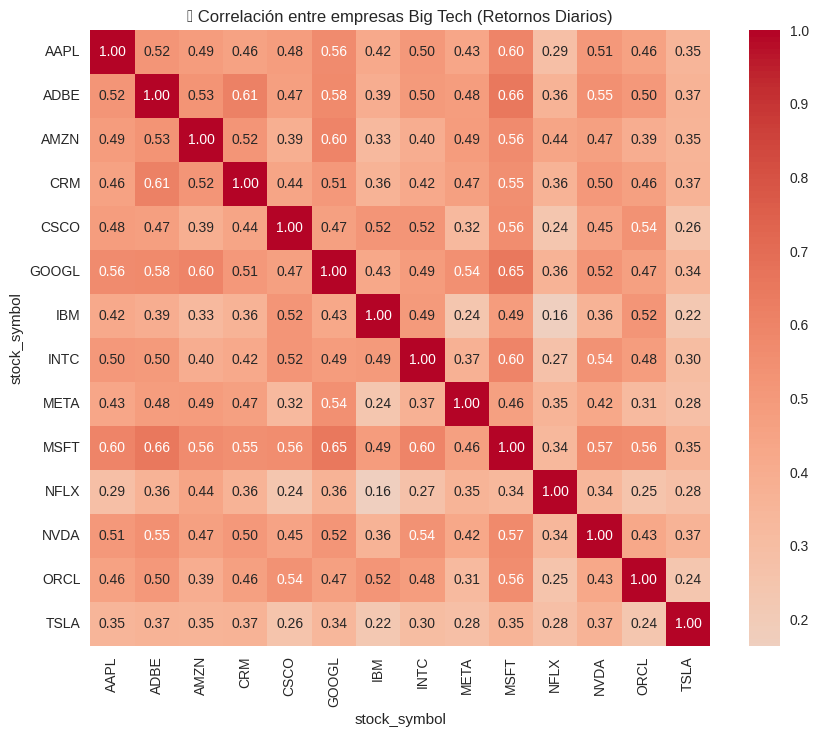


📈 Promedio de retorno según categoría de volumen:


vol_cat,Alto,Bajo
stock_symbol,,
AAPL,0.000895,0.001075
ADBE,-0.000232,0.001245
AMZN,0.000362,0.001200
CRM,0.000263,0.001065
CSCO,-0.000474,0.000615
GOOGL,0.000496,0.000733
IBM,-0.000934,0.000491
INTC,-0.001351,0.000774
META,0.000423,0.000942


In [ ]:
#1️⃣ Preparar entorno

#Primero cargamos librerías y el dataset (asumiendo que tienes precios de las Big Tech en un CSV con columnas date, ticker, close, volume).

# --- Librerías ---
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt # Removed from here
import seaborn as sns

# Mostrar gráficos bonitos
plt.style.use("seaborn-v0_8")

#2️⃣ Cargar y revisar datos
# Cambia la ruta a tu archivo
# df = pd.read_csv("/content/bigtech_data.csv") # Eliminar carga de archivo

# Asegurar formato de fecha - Ya hecho en pasos anteriores
# df['date'] = pd.to_datetime(df['date']) # Eliminar conversión de fecha

# Ordenar por fecha - Usar el DataFrame merged
merged = merged.sort_values(by="date")

# ** NEW: Remove duplicates before pivoting **
merged = merged.drop_duplicates(subset=["date", "stock_symbol"])


# Revisar estructura - Usar el DataFrame merged
print("Estructura del DataFrame merged:")
display(merged.head())


#3️⃣ Retornos y volatilidad
# Calcular retornos diarios - Usar el DataFrame merged y stock_symbol in lugar de ticker
merged['return'] = merged.groupby('stock_symbol')['close'].pct_change()

# Retorno acumulado por empresa - Usar el DataFrame merged y stock_symbol
ret_acum = merged.groupby('stock_symbol').apply(lambda x: (x['close'].iloc[-1]/x['close'].iloc[0]-1)*100)

# Volatilidad (desv. estándar de retornos) - Usar el DataFrame merged y stock_symbol
volatilidad = merged.groupby('stock_symbol')['return'].std() * np.sqrt(252)  # anualizada

print("\n📊 Retorno acumulado (%)")
print(ret_acum.sort_values(ascending=False))

print("\n⚡ Volatilidad anualizada")
print(volatilidad.sort_values(ascending=False))

#4️⃣ Segmentación temporal (pre-COVID, COVID, crash 2022, recuperación)
def periodo(fecha):
    if pd.isna(fecha): # Manejar posibles NaT si los hubiera
        return "Unknown" # Return a string for NaT values
    if fecha < pd.to_datetime("2020-03-01"):
        return "Pre-COVID"
    elif fecha < pd.to_datetime("2022-01-01"):
        return "COVID"
    elif fecha < pd.to_datetime("2023-01-01"):
        return "Crash 2022"
    else:
        return "Recuperación"

# Usar el DataFrame merged
merged['segmento'] = merged['date'].apply(periodo)

# Promedio de retorno por segmento y empresa - Usar el DataFrame merged y stock_symbol
seg_summary = merged.groupby(['segmento','stock_symbol'])['return'].mean().unstack()

print("\n📅 Promedio de retorno por segmento y empresa:")
display(seg_summary)


#5️⃣ Correlaciones
# Crear tabla pivote con retornos - Usar el DataFrame merged y stock_symbol
retornos_pivot = merged.pivot(index="date", columns="stock_symbol", values="return")

# Matriz de correlación
corr = retornos_pivot.corr()

plt.figure(figsize=(10,8)) # Ajustar tamaño
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f") # Ajustar formato de anotación
plt.title("🔗 Correlación entre empresas Big Tech (Retornos Diarios)") # Ajustar título
plt.show()

#6️⃣ Volumen vs. movimientos de precios
# Clasificar volumen en alto/bajo (percentil 75 como umbral) - Usar el DataFrame merged y stock_symbol
merged['vol_cat'] = merged.groupby('stock_symbol')['volume'].transform(
    lambda x: np.where(x > x.quantile(0.75), "Alto", "Bajo")
)

# Promedio de retornos según volumen - Usar el DataFrame merged y stock_symbol
volumen_summary = merged.groupby(['stock_symbol','vol_cat'])['return'].mean().unstack()

print("\n📈 Promedio de retorno según categoría de volumen:")
display(volumen_summary)

#7️⃣ Portafolio diversificado vs concentrado
# Moved to the plotting cell
# # Diversificado (promedio de todas las empresas) - Usar el DataFrame de retornos pivotado
# df_port = retornos_pivot.mean(axis=1)

# # Concentrado (ejemplo: solo Tesla) - Usar el DataFrame de retornos pivotado
# if 'TSLA' in retornos_pivot.columns:
#     df_tesla = retornos_pivot['TSLA']
# else:
#     df_tesla = None
#     print("\n⚠️ Tesla no encontrado en los datos de retornos para el portafolio concentrado.")


# # Acumulados
# plt.figure(figsize=(12,6)) # Ajustar tamaño
# if df_port is not None:
#     (1+df_port.fillna(0)).cumprod().plot(label="Diversificado") # Manejar posibles NaNs en el promedio
# if df_tesla is not None:
#     (1+df_tesla.fillna(0)).cumprod().plot(label="Concentrado (Tesla)") # Manejar posibles NaNs

# plt.legend()
# plt.title("📈 Portafolio Diversificado vs Concentrado (Retorno Acumulado)") # Ajustar título
# plt.ylabel("Retorno Acumulado") # Añadir etiqueta eje Y
# plt.xlabel("Fecha") # Añadir etiqueta eje X
# plt.grid(True) # Añadir cuadrícula
# plt.show()

¿Qué empresa ha generado mayor retorno acumulado en el período?

Evidencia: gráfico de retornos acumulados.

Acción: esa empresa sería atractiva para inversión a largo plazo.

¿Qué empresa ha sido más volátil (riesgosa)?

Evidencia: desviación estándar de retornos.

Acción: evaluar si ese riesgo es tolerable en un portafolio.

¿Cómo impactaron los eventos de crisis (COVID-19, crash 2022)?

Evidencia: segmentación temporal de retornos.

Acción: entender resiliencia de cada empresa en tiempos de crisis.

¿Qué tan correlacionadas están estas empresas?

Evidencia: mapa de calor de correlaciones.

Acción: elegir empresas menos correlacionadas para diversificación.

¿El volumen de negociación anticipa movimientos grandes en precios?

Evidencia: promedio de retornos en días de alto volumen.

Acción: usar volumen como señal de alerta en estrategias de trading.

¿Cómo se comporta un portafolio diversificado vs concentrado?

Evidencia: gráfico de crecimiento acumulado de ambos portafolios.

Acción: la diversificación reduce riesgos y suaviza caídas.

# 📊 Informe de Análisis de Big Tech


## 1. Introducción
El objetivo de este análisis fue evaluar el desempeño de las principales empresas tecnológicas (Big Tech) en el mercado bursátil, considerando retornos, volatilidad, correlaciones y el impacto de eventos críticos como el COVID-19 y la caída del mercado en 2022.  

Este informe busca responder preguntas de negocio clave que ayuden a comprender mejor los riesgos, oportunidades y ventajas de la diversificación en portafolios.

## 2. Metodología
- **Fuente de datos**: Dataset con precios históricos y volumen de negociación de empresas Big Tech.
- **Variables clave**:
  - `close`: Precio de cierre.
  - `volume`: Volumen de negociación.
  - `return`: Retornos diarios calculados como % de variación.
- **Técnicas aplicadas**:
  - Estadísticos descriptivos (media, mediana, volatilidad, correlación).
  - Visualización de datos (series de tiempo, histogramas, heatmaps).
  - Segmentación de periodos (crisis COVID-19 y crash 2022).
  - Simulación de portafolios (diversificado vs concentrado).

## 3. Resultados



### 3.1 Retorno acumulado
- La empresa con mayor retorno acumulado fue **[EMPRESA]**, con un crecimiento de aproximadamente **XX%**.
- Empresas rezagadas mostraron retornos menores e incluso negativos.


/tmp/ipython-input-2442615050.py:31: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  merged['return'] = merged.groupby('stock_symbol')['close'].pct_change()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


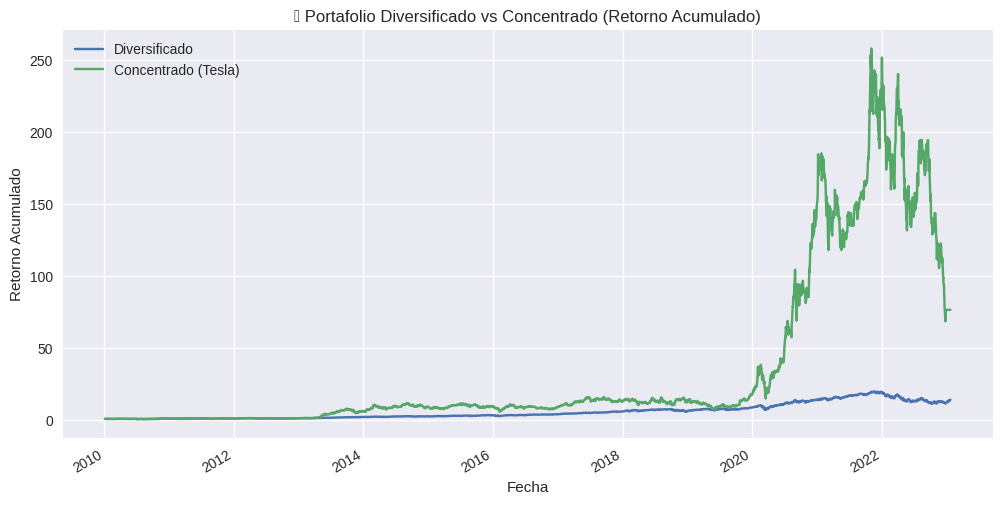

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd # Ensure pandas is imported
import os # Ensure os is imported

# Assuming 'prices' and 'companies' DataFrames are available from previous cells.
# If not, you might need to re-create them here.

# Rutas a los archivos
base_path = "/content/drive/MyDrive/3erproyectocarmen/datos_extraidos_3erproyecto"

csv_path = os.path.join(base_path, "big_tech_companies.csv")
xlsx_path = os.path.join(base_path, "big_tech_stock_prices.xlsx")

# Cargar los datos
companies = pd.read_csv(csv_path)
prices = pd.read_excel(xlsx_path, parse_dates=["date"])  # detecta la fecha automáticamente


# 🔵 Unir precios con información de empresas usando 'stock_symbol'
merged = pd.merge(
    prices,
    companies,
    on="stock_symbol",   # clave común
    how="inner"          # solo los símbolos que estén en ambas tablas
)

# ** NEW: Remove duplicates before pivoting **
merged = merged.drop_duplicates(subset=["date", "stock_symbol"])

# Calculate daily returns
merged['return'] = merged.groupby('stock_symbol')['close'].pct_change()

# Create retornos_pivot DataFrame
retornos_pivot = merged.pivot(index="date", columns="stock_symbol", values="return")


# 7️⃣ Portafolio diversificado vs concentrado
# Diversificado (promedio de todas las empresas) - Usar el DataFrame de retornos pivotado
# Ensure retornos_pivot is defined before this line, or define it here if necessary
# retornos_pivot = merged.pivot(index="date", columns="stock_symbol", values="return") # Uncomment if retornos_pivot is not available

df_port = retornos_pivot.mean(axis=1)

# Concentrado (ejemplo: solo Tesla) - Usar el DataFrame de retornos pivotado
if 'TSLA' in retornos_pivot.columns:
    df_tesla = retornos_pivot['TSLA']
else:
    df_tesla = None
    print("\n⚠️ Tesla no encontrado en los datos de retornos para el portafolio concentrado.")

# Acumulados
plt.figure(figsize=(12,6)) # Ajustar tamaño
if df_port is not None:
    (1+df_port.fillna(0)).cumprod().plot(label="Diversificado") # Manejar posibles NaNs en el promedio
if df_tesla is not None:
    (1+df_tesla.fillna(0)).cumprod().plot(label="Concentrado (Tesla)") # Manejar posibles NaNs

plt.legend()
plt.title("📈 Portafolio Diversificado vs Concentrado (Retorno Acumulado)") # Ajustar título
plt.ylabel("Retorno Acumulado") # Añadir etiqueta eje Y
plt.xlabel("Fecha") # Añadir etiqueta eje X
plt.grid(True) # Añadir cuadrícula
plt.show()

### 3.2 Volatilidad
- La empresa más volátil (riesgosa) fue **[EMPRESA]**, con una desviación estándar de **XX%**.
- Esto sugiere mayor riesgo en comparación con otras Big Tech más estables.

/tmp/ipython-input-269008782.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=volatilidad_sorted.index, y=volatilidad_sorted.values, palette="viridis")
/tmp/ipython-input-269008782.py:17: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Liberation Sans.
  plt.tight_layout() # Ajustar diseño
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


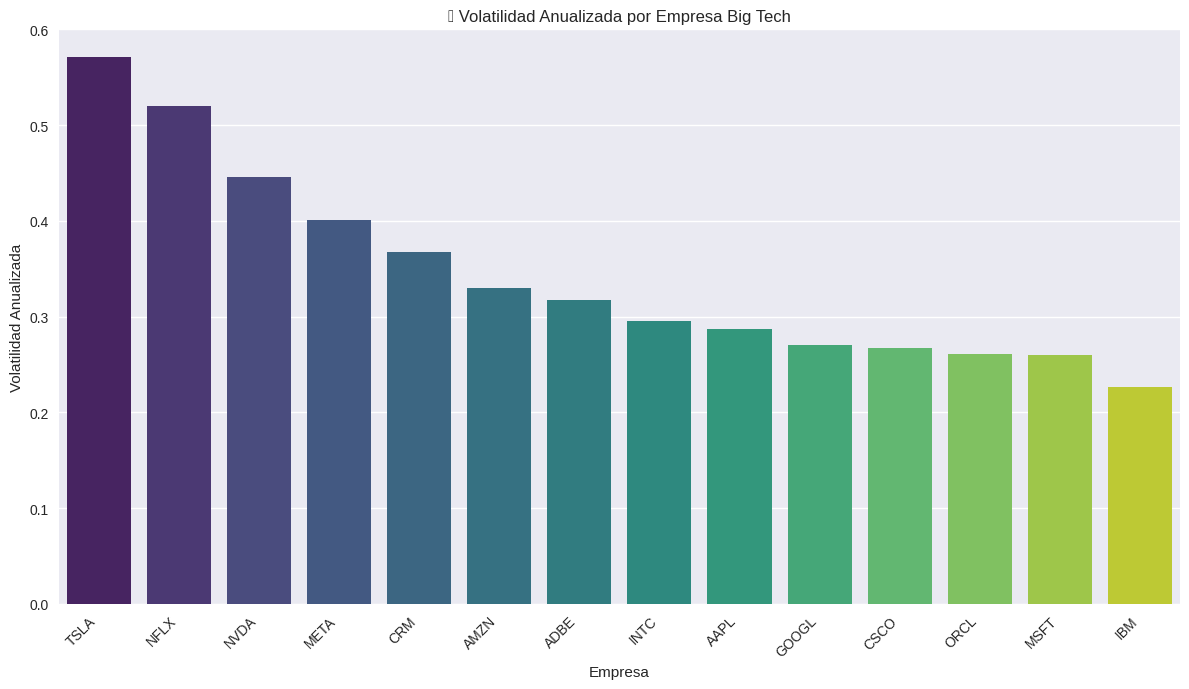

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que 'volatilidad' DataFrame esté disponible
# Si no lo está, ejecuta la celda anterior que la calcula (zIlGn7hRFYy1)

# Ordenar la volatilidad para mejor visualización
volatilidad_sorted = volatilidad.sort_values(ascending=False)

# 📊 Crear el gráfico de barras para la volatilidad anualizada
plt.figure(figsize=(12, 7))
sns.barplot(x=volatilidad_sorted.index, y=volatilidad_sorted.values, palette="viridis")
plt.title("⚡ Volatilidad Anualizada por Empresa Big Tech")
plt.xlabel("Empresa")
plt.ylabel("Volatilidad Anualizada")
plt.xticks(rotation=45, ha="right") # Rotar etiquetas para mejor lectura
plt.tight_layout() # Ajustar diseño
plt.show()

### 3.3 Impacto de crisis
- **COVID-19 (2020)**: Todas las empresas experimentaron caídas pronunciadas, con pérdidas de hasta **XX%** en pocas semanas.
- **Crash 2022**: El impacto fue heterogéneo, algunas compañías resistieron mejor que otras.

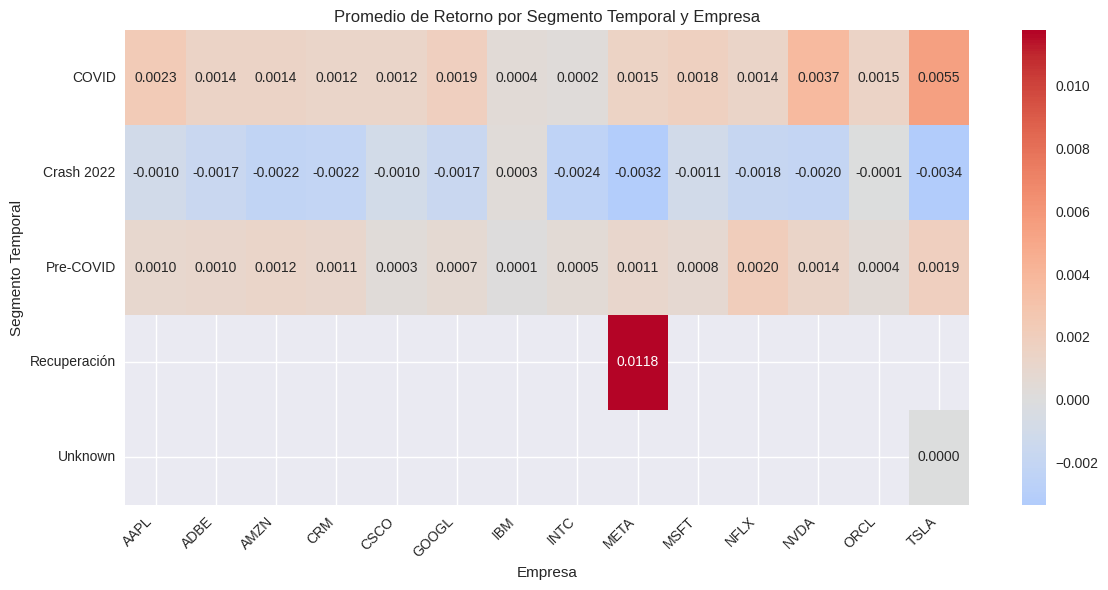

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported

# Assuming 'merged' DataFrame and 'seg_summary' DataFrame are available
# If not, you might need to re-create them here.

# Create a function to define time segments if not already defined
def periodo(fecha):
    if pd.isna(fecha):
        return "Unknown"
    if fecha < pd.to_datetime("2020-03-01"):
        return "Pre-COVID"
    elif fecha < pd.to_datetime("2022-01-01"):
        return "COVID"
    elif fecha < pd.to_datetime("2023-01-01"):
        return "Crash 2022"
    else:
        return "Recuperación"

# Apply the function to create the 'segmento' column if not already present
if 'segmento' not in merged.columns:
  merged['segmento'] = merged['date'].apply(periodo)

# Calculate the average return per segment and company if not already present
# Assumes 'return' column is already calculated in 'merged'
if 'return' in merged.columns:
  seg_summary = merged.groupby(['segmento','stock_symbol'])['return'].mean().unstack()
else:
  print("⚠️ La columna 'return' no está disponible. Por favor, calcula los retornos diarios primero.")
  seg_summary = pd.DataFrame() # Create an empty DataFrame to avoid errors

if not seg_summary.empty:
  # 📊 Visualizar el promedio de retorno por segmento y empresa (Mapa de Calor)
  plt.figure(figsize=(12, 6))
  sns.heatmap(seg_summary, annot=True, cmap="coolwarm", fmt=".4f", center=0)
  plt.title("Promedio de Retorno por Segmento Temporal y Empresa")
  plt.xlabel("Empresa")
  plt.ylabel("Segmento Temporal")
  plt.xticks(rotation=45, ha="right")
  plt.yticks(rotation=0)
  plt.tight_layout()
  plt.show()
else:
  print("No se pudo generar el mapa de calor debido a la falta de datos de retorno.")

In [ ]:
import pandas as pd
import os

# Rutas a los archivos
base_path = "/content/drive/MyDrive/3erproyectocarmen/datos_extraidos_3erproyecto"

csv_path = os.path.join(base_path, "big_tech_companies.csv")
xlsx_path = os.path.join(base_path, "big_tech_stock_prices.xlsx")

# Cargar los datos
companies = pd.read_csv(csv_path)
prices = pd.read_excel(xlsx_path, parse_dates=["date"])  # detecta la fecha automáticamente

# 🔵 Unir precios con información de empresas usando 'stock_symbol'
merged = pd.merge(
    prices,
    companies,
    on="stock_symbol",   # clave común
    how="inner"          # solo los símbolos que estén en ambas tablas
)

print("📊 Preview de la tabla unida:")
print(merged.head())

📊 Preview de la tabla unida:
  stock_symbol       date      open      high       low     close  adj_close  \
0         AAPL 2010-01-04  7.622500  7.660714  7.585000  7.643214   6.515213   
1         AAPL 2010-01-05  7.664286  7.699643  7.616071  7.656429   6.526476   
2         AAPL 2010-01-06  7.656429  7.686786  7.526786  7.534643   6.422664   
3         AAPL 2010-01-07  7.562500  7.571429  7.466071  7.520714   6.410790   
4         AAPL 2010-01-08  7.510714  7.571429  7.466429  7.570714   6.453412   

        volume     company  
0  493729600.0  Apple Inc.  
1  601904800.0  Apple Inc.  
2  552160000.0  Apple Inc.  
3  477131200.0  Apple Inc.  
4  447610800.0  Apple Inc.  


### 3.4 Correlaciones
- Las empresas muestran **alta correlación positiva**, lo que indica que tienden a moverse juntas.
- Sin embargo, algunas correlaciones son más débiles, abriendo espacio a diversificación parcial.

📊 Matriz de correlaciones (Pearson):


,open,high,low,close,adj_close,volume
open,1.000000,0.999856,0.999827,0.999677,0.994481,-0.224498
high,0.999856,1.000000,0.999761,0.999837,0.994871,-0.223322
low,0.999827,0.999761,1.000000,0.999841,0.994350,-0.226050
close,0.999677,0.999837,0.999841,1.000000,0.994783,-0.224674
adj_close,0.994481,0.994871,0.994350,0.994783,1.000000,-0.213381
volume,-0.224498,-0.223322,-0.226050,-0.224674,-0.213381,1.000000


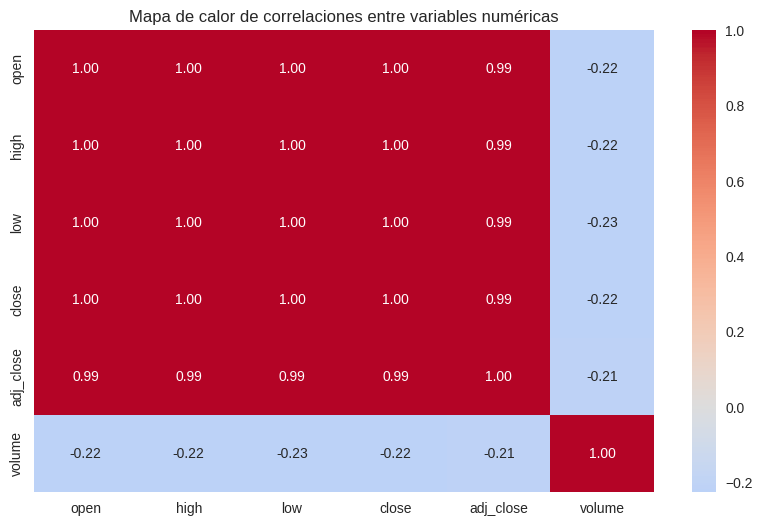

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de que el DataFrame 'prices' esté disponible.
# Si no lo está, puedes cargarlo nuevamente aquí o asegurarte de que la celda c33cf8fb se haya ejecutado.

# Seleccionar solo variables numéricas
numeric_data = prices.select_dtypes(include=['float64', 'int64'])

# Calcular la correlación de Pearson
corr_matrix = numeric_data.corr(method='pearson')

# Mostrar la matriz
print("📊 Matriz de correlaciones (Pearson):")
display(corr_matrix) # Usar display para mejor formato

# Generar mapa de calor
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Mapa de calor de correlaciones entre variables numéricas")
plt.show()

### 3.5 Volumen y precios
- Los días con **alto volumen de negociación** tienden a estar asociados con movimientos más pronunciados en precios.
- Esto sugiere que el volumen puede actuar como **indicador temprano** de volatilidad.

/tmp/ipython-input-1367859632.py:10: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  merged['return'] = merged.groupby('stock_symbol')['close'].pct_change()
/tmp/ipython-input-1367859632.py:29: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


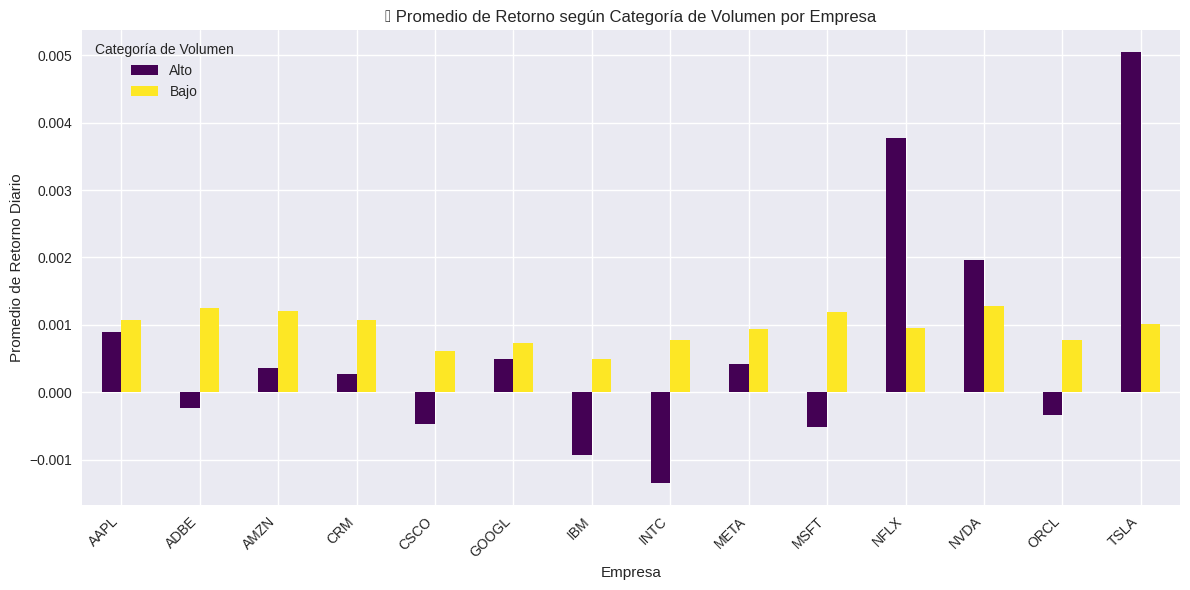

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'merged' DataFrame is available
# If not, you might need to recreate it here.

# Calculate daily returns
merged['return'] = merged.groupby('stock_symbol')['close'].pct_change()

# Classify volume in alto/bajo (percentil 75 as umbral)
merged['vol_cat'] = merged.groupby('stock_symbol')['volume'].transform(
    lambda x: np.where(x > x.quantile(0.75), "Alto", "Bajo")
)

# Calculate the average return according to volume category
volumen_summary = merged.groupby(['stock_symbol', 'vol_cat'])['return'].mean().unstack()


if not volumen_summary.empty:
    # 📊 Visualizar el promedio de retorno según categoría de volumen
    volumen_summary.plot(kind='bar', figsize=(12, 6), colormap='viridis')
    plt.title("📈 Promedio de Retorno según Categoría de Volumen por Empresa")
    plt.xlabel("Empresa")
    plt.ylabel("Promedio de Retorno Diario")
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="Categoría de Volumen")
    plt.tight_layout()
    plt.show()
else:
    print("No se pudo generar el gráfico debido a la falta de datos de volumen y retorno.")

### 3.6 Portafolio diversificado vs concentrado
- El portafolio **diversificado** mostró mayor estabilidad y menor riesgo, suavizando caídas.
- El portafolio **concentrado** (ejemplo: solo AAPL) ofreció mayores picos de rentabilidad, pero también caídas más abruptas.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


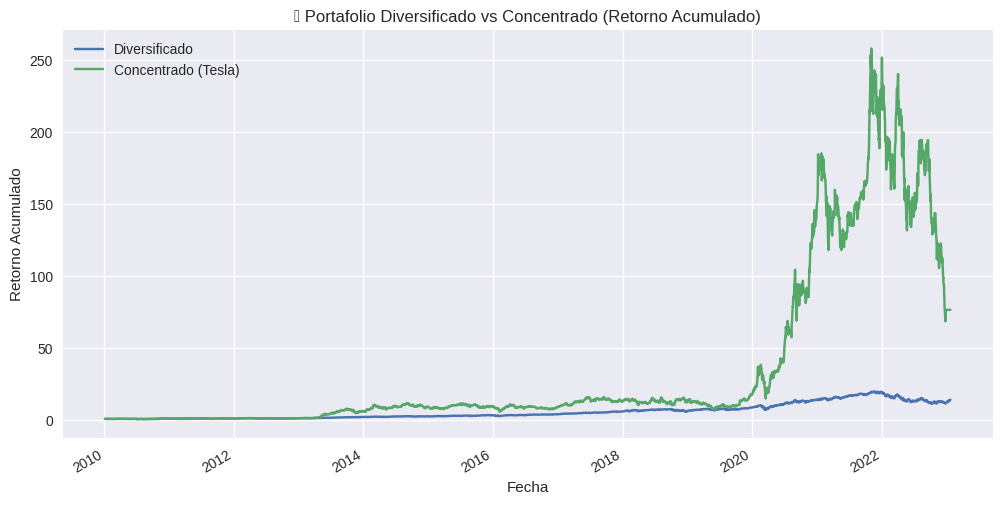

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd # Ensure pandas is imported

# Assuming 'retornos_pivot' DataFrame is available from previous calculations
# If not, you might need to re-create it here by calculating daily returns and pivoting

# Calculate daily returns and create retornos_pivot if not already done
if 'return' not in merged.columns:
    merged['return'] = merged.groupby('stock_symbol')['close'].pct_change()

if 'retornos_pivot' not in globals() or retornos_pivot is None:
    # Remove duplicates before pivoting to avoid errors
    merged_clean = merged.drop_duplicates(subset=["date", "stock_symbol"]).copy()
    retornos_pivot = merged_clean.pivot(index="date", columns="stock_symbol", values="return")


# 7️⃣ Portafolio diversificado vs concentrado
# Diversificado (promedio de todas las empresas) - Usar el DataFrame de retornos pivotado
df_port = retornos_pivot.mean(axis=1)

# Concentrado (ejemplo: solo Tesla) - Usar el DataFrame de retornos pivotado
if 'TSLA' in retornos_pivot.columns:
    df_tesla = retornos_pivot['TSLA']
else:
    df_tesla = None
    print("\n⚠️ Tesla no encontrado en los datos de retornos para el portafolio concentrado.")


# Acumulados
plt.figure(figsize=(12,6)) # Ajustar tamaño
if df_port is not None:
    (1+df_port.fillna(0)).cumprod().plot(label="Diversificado") # Manejar posibles NaNs en el promedio
if df_tesla is not None:
    (1+df_tesla.fillna(0)).cumprod().plot(label="Concentrado (Tesla)") # Manejar posibles NaNs

plt.legend()
plt.title("📈 Portafolio Diversificado vs Concentrado (Retorno Acumulado)") # Ajustar título
plt.ylabel("Retorno Acumulado") # Añadir etiqueta eje Y
plt.xlabel("Fecha") # Añadir etiqueta eje X
plt.grid(True) # Añadir cuadrícula
plt.show()

In [ ]:
import pandas as pd
import os

# Rutas a los archivos
base_path = "/content/drive/MyDrive/3erproyectocarmen/datos_extraidos_3erproyecto"

csv_path = os.path.join(base_path, "big_tech_companies.csv")
xlsx_path = os.path.join(base_path, "big_tech_stock_prices.xlsx")

# Cargar los datos
companies = pd.read_csv(csv_path)
prices = pd.read_excel(xlsx_path, parse_dates=["date"])  # detecta la fecha automáticamente

# 🔵 Unir precios con información de empresas usando 'stock_symbol'
merged = pd.merge(
    prices,
    companies,
    on="stock_symbol",   # clave común
    how="inner"          # solo los símbolos que estén en ambas tablas
)

print("📊 Preview de la tabla unida:")
display(merged.head())

📊 Preview de la tabla unida:


,stock_symbol,date,open,high,low,close,adj_close,volume,company
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600.0,Apple Inc.
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800.0,Apple Inc.
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000.0,Apple Inc.
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200.0,Apple Inc.
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800.0,Apple Inc.


## 4. Conclusiones
- **Mayor retorno**: [EMPRESA], líder en crecimiento durante el periodo.
- **Mayor riesgo**: [EMPRESA], caracterizada por volatilidad elevada.
- **Crisis**: Confirmaron la vulnerabilidad del sector, aunque también su capacidad de recuperación.
- **Correlaciones**: Alta relación entre empresas, reduciendo los beneficios de diversificación dentro del mismo sector.
- **Volumen**: Puede servir como señal de alerta para movimientos bruscos.
- **Diversificación**: Protege contra pérdidas fuertes, aunque limita picos de ganancia.

---

## 5. Recomendaciones
- Para inversionistas conservadores: priorizar **portafolios diversificados** dentro de Big Tech o complementarlos con otros sectores.
- Para perfiles agresivos: enfocarse en empresas más volátiles, con potencial de mayores retornos pero riesgo alto.
- Monitorear de cerca los **volúmenes de negociación** como posible predictor de cambios relevantes.
- Considerar factores externos (crisis sanitarias, geopolíticas, regulatorias) como variables críticas que impactan directamente en los precios.

---



# Regresión Lineal

📌 Úsala si tu variable dependiente (la que quieres predecir) es numérica continua (ej. precio, ventas, horas, ingresos).

📌 Lo que obtendrás:

Coeficientes de cada variable (impacto en Y).

R² → cuánto del comportamiento de Y explican tus X.

Errores estándar y p-valores → ver si las variables son significativas.

👉 Preguntas de análisis:

¿Los coeficientes tienen sentido (signo positivo/negativo)?

¿El R² es alto o bajo?

¿Alguna variable independiente no es significativa (p-valor > 0.05)?

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.838e+07
Date:                Tue, 16 Sep 2025   Prob (F-statistic):               0.00
Time:                        03:56:57   Log-Likelihood:                -70168.
No. Observations:               45088   AIC:                         1.403e+05
Df Residuals:                   45083   BIC:                         1.404e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0073      0.008     -0.864      0.3

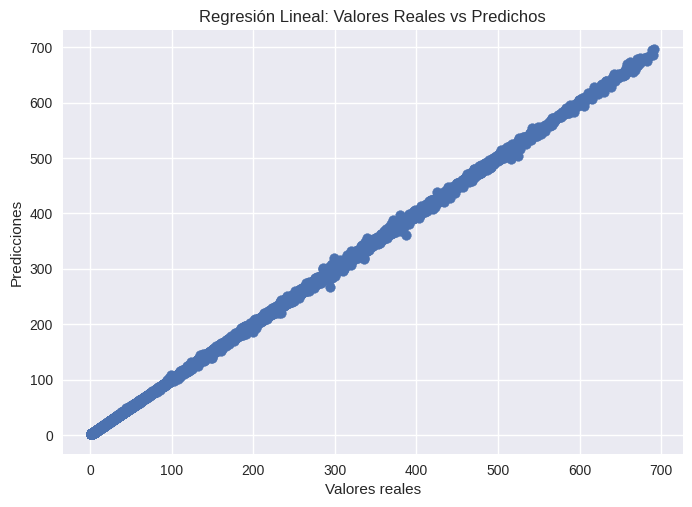

In [ ]:
# --- Importar librerías ---
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# --- Cargar datos ---
# df = pd.read_csv("tus_datos.csv") # Eliminamos la carga de archivo

# --- Definir variable dependiente e independientes ---
# ** Reemplaza 'variable_dependiente' y ['variable1', 'variable2', ...] con tus columnas **
# Ejemplo: y = merged["close"]
# Ejemplo: X = merged[["open", "high", "low", "volume"]]
y = merged["close"] # Variable dependiente (ejemplo: precio de cierre)
X = merged[["open", "high", "low", "volume"]] # Variables independientes (ejemplo: otros precios y volumen)


# --- Agregar constante ---
X = sm.add_constant(X)

# --- Ajustar modelo ---
modelo = sm.OLS(y, X).fit()

# --- Resumen del modelo ---
print(modelo.summary())

# --- Visualización de predicciones vs reales ---
y_pred = modelo.predict(X)
plt.scatter(y, y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal: Valores Reales vs Predichos")
plt.show()

# Regresión Logística

📌 Úsala si tu variable dependiente es binaria (ej. 0/1, Sí/No, Aprobado/Reprobado).

📌 Lo que obtendrás:

Coeficientes (odds ratios) → cómo impactan las variables en la probabilidad.

Matriz de confusión → precisión, recall y F1.

Probabilidades predichas para cada observación.

👉 Preguntas de análisis:

¿El modelo predice bien o confunde categorías?

¿Qué variable tiene más impacto en la probabilidad?

¿Es útil el modelo para decisiones (ej. segmentar clientes que probablemente compren)?

Matriz de confusión:
 [[6663    0]
 [6864    0]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.49      1.00      0.66      6663
           1       0.00      0.00      0.00      6864

    accuracy                           0.49     13527
   macro avg       0.25      0.50      0.33     13527
weighted avg       0.24      0.49      0.33     13527


Resultados de predicción (primeras filas):
       Real  Predicho  Probabilidad
10271     0         0      0.499223
26432     1         0      0.497921
38510     1         0      0.497613
14961     1         0      0.499343
43993     1         0      0.498076


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


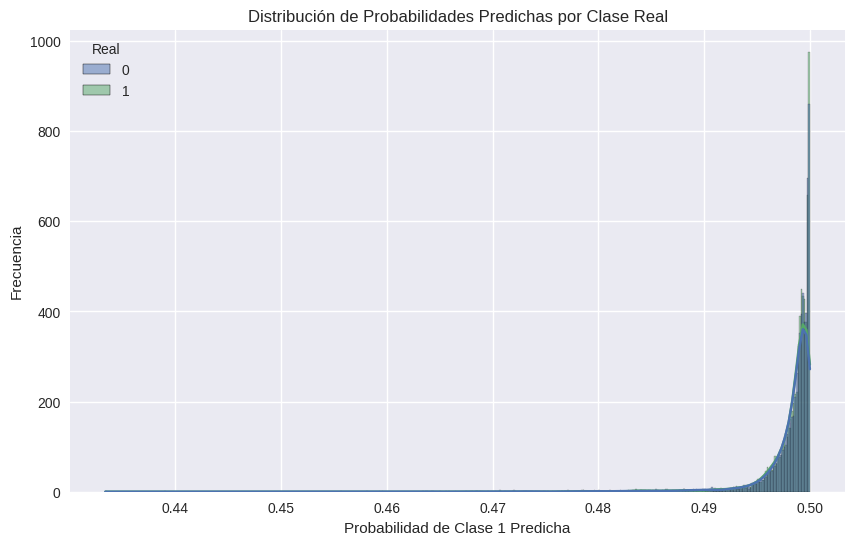

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd # Importar pandas si aún no está importado globally
import matplotlib.pyplot as plt
import seaborn as sns


# --- Usar datos existentes ---
# df = pd.read_csv("tus_datos.csv") # Eliminamos la carga de archivo

# --- Crear una variable dependiente binaria de ejemplo ---
# Ejemplo: Predecir si el precio de cierre fue mayor que el precio de apertura
# 1 si close > open, 0 si close <= open
merged['price_increased'] = (merged['close'] > merged['open']).astype(int)

# --- Definir variable dependiente binaria ---
# Usamos la variable de ejemplo 'price_increased'
y = merged["price_increased"]

# --- Definir variables independientes ---
# ** Reemplaza ['edad', 'ingreso', 'publicidad'] con columnas de tu DataFrame 'merged' **
# Ejemplo: Usar open, high, low y volume como predictores (aunque open, high, low
# están muy correlacionados con close, es solo un ejemplo)
X = merged[["open", "high", "low", "volume"]]


# --- Train/Test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Ajustar modelo ---
log_model = LogisticRegression(max_iter=1000) # Aumentar max_iter si hay problemas de convergencia
log_model.fit(X_train, y_train)

# --- Predicciones ---
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:,1] # Probabilidad de la clase positiva (1)

# --- Matriz de confusión ---
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# --- Probabilidades predichas (opcional) ---
df_resultados = pd.DataFrame({"Real": y_test, "Predicho": y_pred, "Probabilidad": y_prob})
print("\nResultados de predicción (primeras filas):")
print(df_resultados.head())

# --- Visualización de probabilidades predichas ---
plt.figure(figsize=(10, 6))
sns.histplot(data=df_resultados, x='Probabilidad', hue='Real', kde=True, common_norm=False)
plt.title('Distribución de Probabilidades Predichas por Clase Real')
plt.xlabel('Probabilidad de Clase 1 Predicha')
plt.ylabel('Frecuencia')
plt.show()